# Рынок заведений общественного питания Москвы

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар — и какими будут расположение, меню и цены.

Нам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

Нам предстоят следующие шаги:
- Изучить имеющиеся данные о рынке заведений общественного питания Москвы.
- Сделать их предобработку: рассмотреть и удалить критичные пропуски, устранить дубликаты и некорректные данные.
- Исследовать рынок Москвы, найти интересные особенности среди заведений общественного питания.
- Проанализировать информацию о кофейнях и дать рекомендации, которые в будущем помогут инвесторам в выборе подходящего места для открытия своего заведения.
<a id='table_of_contents'></a>

**План работы:**
- [Загрузить таблицы и изучить общую информацию](#section_id1)
- [Провести предобработку](#section_id2)
    - [Удалить пропуски](#section_id3)
    - [Обработать дубликаты и аномалии](#section_id4)
    - [Добавить новые столбцы](#section_id5)
- [Провести исследовательский анализ данных](#section_id6)
    - [Общий анализ заведений](#section_id7)
    - [Анализ сетевых заведений](#section_id8)
    - [Анализ расположения заведений](#section_id9)
- [Сформулировать общий вывод](#section_id10)
- [Провести детализацию по открытию кофейни](#section_id11)
- [Сформулировать рекомендации](#section_id12)

**Описание данных**
- `name` — название заведения
- `address` — адрес заведения
- `category` — категория заведения
- `hours` — информация о днях и часах работы
- `lat` — широта географической точки, в которой находится заведение
- `lng` — долгота географической точки, в которой находится заведение
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»
    - «Цена чашки капучино: 130–220 ₽»
    - «Цена бокала пива: 400–600 ₽»
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки `«Средний счёт»`:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки `«Цена одной чашки капучино»`:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым
    - 1 — заведение является сетевым
- `district` — административный район, в котором находится заведение
- `seats` — количество посадочных мест

## Загрузка таблицы и изучение общей информации о данных
<a id='section_id1'></a>

In [1]:
#импортируем библиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.io as pio
from plotly import graph_objects as go 
from IPython.display import Image
!pip install plotly==5.16.1 
!pip install kaleido

#устанавливаем единый стиль и палитру для графиков
sns.set_palette(['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52'])
sns.set_style('whitegrid')

In [2]:
#считываем данные из csv-файла
df = pd.read_csv('/datasets/moscow_places.csv')
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [3]:
#выводим по нему информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


По предварительной информации о датасете мы можем увидеть:
- Размер датасета: 8406 строк и 14 столбцов
- В 6 столбцах из имеющихся есть пропуски
- Данные представлены в трёх типах: `object`, `float` и `int`

## Предобработка данных
<a id='section_id2'></a>

### Изучение имеющихся данных
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [4]:
#выведем статистику по данным типа object
df.describe(include=['object'])

,name,category,address,district,hours,price,avg_bill
count,8406,8406,8406,8406,7870,3315,3816
unique,5614,8,5753,9,1307,4,897
top,Кафе,кафе,"Москва, проспект Вернадского, 86В",Центральный административный округ,"ежедневно, 10:00–22:00",средние,Средний счёт:1000–1500 ₽
freq,189,2378,28,2242,759,2117,241


- Есть дубликаты в столбце `name` и `address`, последнее может быть объяснено, если кафе и ресторан, например, находятся в одном здании, или заведения находятся в рамках одного фудкорта. 
- Есть пропуски в столбцах `hours`, `price` и `avg_bill`. Последние могут быть объяснены отсутствием данных, но пропуски в первом из перечисленных столбцов вызывают вопросы: заведения не открылись или работают круглосуточно? Пропусков в `hours` более 6%.

In [5]:
#выведем статистику по числовым значениям
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,8406.0,55.750109,0.069658,55.573942,55.705155,55.753425,55.795041,55.928943
lng,8406.0,37.608570,0.098597,37.355651,37.538583,37.605246,37.664792,37.874466
rating,8406.0,4.229895,0.470348,1.000000,4.100000,4.300000,4.400000,5.000000
middle_avg_bill,3149.0,958.053668,1009.732845,0.000000,375.000000,750.000000,1250.000000,35000.000000
middle_coffee_cup,535.0,174.721495,88.951103,60.000000,124.500000,169.000000,225.000000,1568.000000
chain,8406.0,0.381275,0.485729,0.000000,0.000000,0.000000,1.000000,1.000000
seats,4795.0,108.421689,122.833396,0.000000,40.000000,75.000000,140.000000,1288.000000


In [6]:
#выведем долю пропусков
df.isna().mean().sort_values(ascending=False)

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
price                0.605639
avg_bill             0.546039
seats                0.429574
hours                0.063764
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
lat                  0.000000
lng                  0.000000
rating               0.000000
chain                0.000000
dtype: float64

- Пропуски в `middle_avg_bill` и `middle_coffee_cup` зависят от данных в столбце `avg_bill` - они ожидаемы.
- В столбце с количеством посадочных мест пропусков более 42%, возможно, это связано с категорией заведения. Также вызывает подозрение аномально большое количество посадочных мест: 1288. Нужно проверить. 
- В столбце  `chain` информацию можно изменить на более понятную.

#### Замена данных в столбце `chain`
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>
Данные в виде нулей и единиц лучше заменить или на булево значение, или на текст: сетевое и несетевое заведение, так как информация в таком виде будет более наглядной и понятной при анализе датасета.

In [7]:
#заменяем значения в новом столбце
df['chain_new'] = 'Несетевое заведение'
df.loc[df['chain'] == 1, 'chain_new'] = 'Сетевое заведение'
#возвращаем значения в изначальный
df['chain'] = df['chain_new']
#удаляем вспомогательный столбец
df = df.drop(columns = ['chain_new'], axis = 1)
#проверяем получившийся датасет
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,Несетевое заведение,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,Несетевое заведение,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,Несетевое заведение,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,Несетевое заведение,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,Сетевое заведение,148.0


Теперь данные в столбце `chain` стали более наглядными.

### Удаление пропусков
<a id='section_id3'></a>

Пропуски есть в столбцах: 
- `hours`  — информация о днях и часах работы
- `price` — категория цен в заведении
- `avg_bill` — средняя стоимость заказа в виде диапазона
- `middle_avg_bill`  — средний чек - ***пропуски нормальны***
- `middle_coffee_cup` — стоимость одной чашки капучино - ***пропуски нормальны***
- `seats` — количество посадочных мест

#### Изучение пропусков в `hours`
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [8]:
#выявим категории заведений с пропусками во времени работы
df[df['hours'].isna()]['category'].unique()

array(['булочная', 'кафе', 'быстрое питание', 'бар,паб', 'пиццерия',
       'ресторан', 'кофейня', 'столовая'], dtype=object)

Уникальных значений в столбце `category` — 8, в строках с пропусками о времени работы встречаются все эти категории заведений. Выявить какую-то закономерность не получится. Рассмотрим пропуски в `hours` нагляднее.

In [9]:
print('Количество пропусков в столбце "hours":', df['hours'].isna().sum())
df[df['hours'].isna()].head()

Количество пропусков в столбце "hours": 536


,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
38,Ижора,булочная,"Москва, Ижорский проезд, 5А",Северный административный округ,NaN,55.888366,37.514856,4.4,NaN,NaN,NaN,NaN,Несетевое заведение,NaN
40,Кафе,кафе,"Москва, Ижорская улица, 18, стр. 1",Северный административный округ,NaN,55.895115,37.524902,3.7,NaN,NaN,NaN,NaN,Несетевое заведение,NaN
44,Кафетерий,кафе,"Москва, Ангарская улица, 24А",Северный административный округ,NaN,55.876289,37.519315,3.8,NaN,NaN,NaN,NaN,Сетевое заведение,8.0
56,Рыба из тандыра,быстрое питание,"Москва, Коровинское шоссе, 46, стр. 5",Северный административный округ,NaN,55.888010,37.515960,1.5,NaN,NaN,NaN,NaN,Несетевое заведение,NaN
108,Кафе,"бар,паб","Москва, МКАД, 82-й километр, вл18",Северо-Восточный административный округ,NaN,55.908930,37.558777,4.2,NaN,NaN,NaN,NaN,Несетевое заведение,NaN


Мы имеем 536 пропусков в данных на с сервисов Яндекс Карты и Яндекс Бизнес. Если проверить пропуски в столбце со временем работы заведений на других площадках, то можно найти недостающие данные, например:
- Заведение по адресу [Москва, Ижорский проезд, 5А](https://2gis.ru/moscow/firm/70000001020477150) работает круглосуточно
- Заведение по адресу [Москва, Ижорская улица, 18, стр. 1](https://restaurantguru.ru/Kafe-Moscow-122) работает с 9:00 до 20:00
- Заведение по адресу [Москва, Ангарская улица, 24А](https://2gis.ru/moscow/firm/70000001076578681) работает с 8:00 до 22:00

Однако, такое заполнение пропусков нецелесообразно, учитывая их количество — это займёт слишком много времени, а также может не отражать действительность относительно остального датасета: мы работаем с данными за 2022 год, в то время как в открытых источниках можно найти актуальную информацию — и некоторые заведения могли изменить время работы за этот период или сменить место и название. 

Заменим пропуски в столбце `hours` на `unknown`, чтобы мы смогли использовать эти строки при анализе в дальнейшем, однако смысловой нагрузки такая замена не понесёт.

In [10]:
df['hours'] = df['hours'].fillna('unknown')
print('Количество пропусков в столбце "hours":', df['hours'].isna().sum())

Количество пропусков в столбце "hours": 0


#### Изучение пропусков в `price`
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [11]:
#выявим категории заведений с пропусками в категориях цен
df[df['price'].isna()]['category'].unique()

array(['кафе', 'кофейня', 'булочная', 'быстрое питание', 'пиццерия',
       'ресторан', 'бар,паб', 'столовая'], dtype=object)

Здесь тоже не наблюдается прямой зависимости между пропусками и категориями заведений.

In [12]:
print('Количество пропусков в столбце "price":', df['price'].isna().sum())
df[df['price'].isna()].head(5)

Количество пропусков в столбце "price": 5091


,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,Несетевое заведение,NaN
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,Несетевое заведение,NaN
11,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",55.881770,37.492362,4.9,NaN,NaN,NaN,NaN,Несетевое заведение,NaN
13,Буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",55.877007,37.504980,4.8,NaN,NaN,NaN,NaN,Сетевое заведение,180.0
19,Пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",55.887969,37.515688,4.4,NaN,NaN,NaN,NaN,Сетевое заведение,NaN


В столбце `price` пропусков ещё больше: 5091. Это более 60% датасета. Заменить данные вручную нельзя, это исказит результаты анализа по известным категориям цен в заведениях. Мы не будем производить замену в этом столбце, чтобы в дальнейшем можно было использовать имеющиеся данные для анализа без использования среза.

#### Изучение пропусков в `avg_bill`
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [13]:
#выявим категории заведений с пропусками в диапазонах средних чеков
df[df['avg_bill'].isna()]['category'].unique()

array(['кафе', 'пиццерия', 'булочная', 'кофейня', 'быстрое питание',
       'ресторан', 'бар,паб', 'столовая'], dtype=object)

И снова у нас нет никакой взаимосвязи с категориями, другие столбцы для выявления зависимости с пропусками использовать нецелесообразно: остальные имеющиеся данные не могут быть связаны с пропусками в данных о диапазонах средних чеков. Рассмотрим пропуски детальнее, чтобы убедиться в этом.

In [14]:
print('Количество пропусков в столбце "avg_bill":', df['avg_bill'].isna().sum())
df[df['avg_bill'].isna()].head()

Количество пропусков в столбце "avg_bill": 4590


,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,Несетевое заведение,NaN
5,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",55.888010,37.509573,4.6,средние,NaN,NaN,NaN,Несетевое заведение,NaN
11,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",55.881770,37.492362,4.9,NaN,NaN,NaN,NaN,Несетевое заведение,NaN
13,Буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",55.877007,37.504980,4.8,NaN,NaN,NaN,NaN,Сетевое заведение,180.0
19,Пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",55.887969,37.515688,4.4,NaN,NaN,NaN,NaN,Сетевое заведение,NaN


Да, данных просто нет — и с этим придётся смириться. Заменять пропуски нецелесообразно, так как этот столбец мы не будем использовать для анализа.

Пропуски в столбцах `middle_avg_bill` и `middle_coffee_cup` напрямую связаны с `avg_bill`, данные в них отбирались по подстрокам «Средний счёт» и «Цена одной чашки капучино», потому отдельно изучать их не будем, как и заменять: столбцы имеют числовой формат и внесение нулевых значений исказит результаты, а замена на `unknown` изменит тип столбца.

#### Изучение пропусков в `seats`
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [15]:
print('Количество пропусков в столбце "seats":', df['seats'].isna().sum())
#выявим категории заведений с пропусками количества посадочных мест
df[df['seats'].isna()]['category'].unique()

Количество пропусков в столбце "seats": 3611


array(['кафе', 'кофейня', 'пиццерия', 'бар,паб', 'булочная', 'столовая',
       'быстрое питание', 'ресторан'], dtype=object)

Даже некоторые рестораны не указывают эту информацию. Пропуски в количестве посадочных мест могут быть в любой категории заведений. Столбец содержит данные типа `int` — замена на 0 может исказить данные датасета. Проверим, в каких категориях нулевое количество посадочных мест, чтобы убедиться в этом.

In [16]:
#создаём новую переменную с датафреймом, чтобы не повредить основной
data = pd.read_csv('/datasets/moscow_places.csv')
#группируем по категориям без посадочных мест
test = data[data.seats == 0].groupby('category').seats.count().sort_values(ascending=False).reset_index()
#выводим таблицу
test

,category,seats
0,кафе,44
1,кофейня,24
2,ресторан,20
3,быстрое питание,18
4,булочная,11
5,пиццерия,10
6,столовая,5
7,"бар,паб",4


Рестораны без посадочных мест не на последнем месте в получившемся списке. Рассмотрим соотношение на круговой диаграмме. 

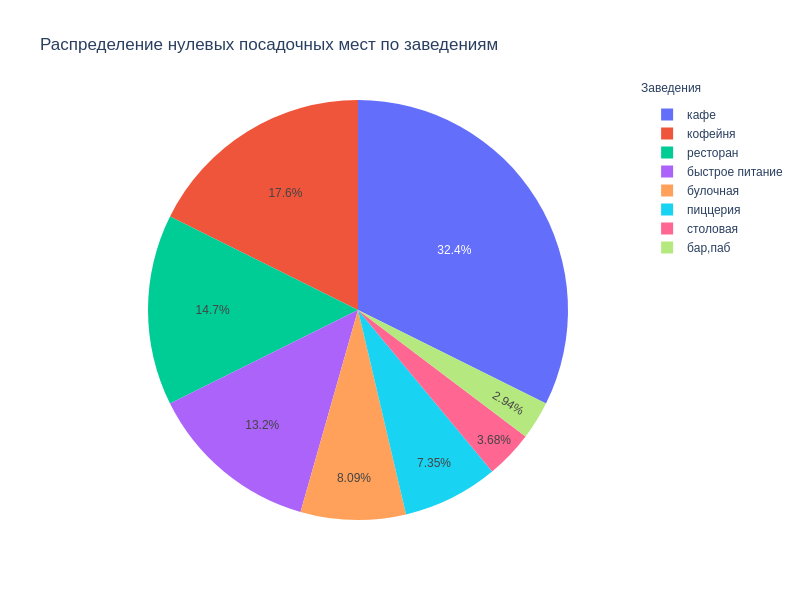

In [17]:

#создаём круговую диаграмму
fig = go.Figure(data=[go.Pie(labels=test['category'], values=test['seats'])]) 
#задаём описание
fig.update_layout(title='Распределение нулевых посадочных мест по заведениям', width=800, height=600,
                  annotations=[dict(x=1.12, y=1.05, text='Заведения', showarrow=False)])
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=800, height=600, scale=1)
Image('figure.png')

Проверим в отдельной переменной, как сильно изменится информация, если заменить пропуски на 0.

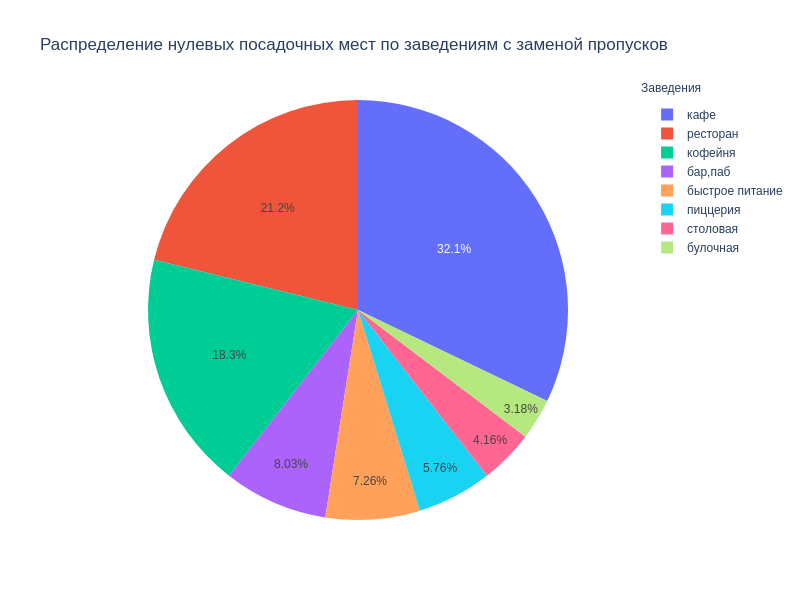

,category,seats
0,кафе,1204
1,ресторан,793
2,кофейня,686
3,"бар,паб",301
4,быстрое питание,272
5,пиццерия,216
6,столовая,156
7,булочная,119


In [18]:
#заменяем пропуски на 0
data['seats'] = data['seats'].fillna(0)
#группируем по категориям заведения без посадочных мест
data = data[data.seats == 0].groupby('category').seats.count().sort_values(ascending=False).reset_index()
#создаём круговую диаграмму
fig = go.Figure(data=[go.Pie(labels=data['category'], values=data['seats'])]) 
#задаём описание
fig.update_layout(title='Распределение нулевых посадочных мест по заведениям с заменой пропусков', width=800, height=600,
                  annotations=[dict(x=1.12, y=1.05, text='Заведения', showarrow=False)])
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=800, height=600, scale=1)
display(Image('figure.png'))
#выводим таблицу
data 

Некоторые категории заведений поменялись местами при подобной замене. Это может существенно отразиться не только на нулевых значениях, но и на всём объеме данных по столбцу `seats`, потому заменять пропуски не будем.

Мы изучили пропуски в следующих столбцах: 
- **hours** — информация о днях и часах работы — пропуски заменили на `unknown`
- **price** — категория цен в заведении — пропуски оставили как есть
- **avg_bill** — средняя стоимость заказа в виде диапазона — пропуски оставили как есть
- **seats** — количество посадочных мест — пропуски оставили как есть

### Обработка дубликатов и аномальных значений
<a id='section_id4'></a>

Во всех категориальных текстовых столбцах уникальных наименований меньше, чем строк в датасете. Мы можем изучить их подробнее, чтобы исключить дубликаты, которые могут повлиять на дальнейший анализ. Текстовые столбцы в датасете: 
- `name` — ***название заведения*** — повторяющие наименования могут быть у сетей или у заведений без ярковыраженной уникальности, например кафе с именем "Кафе" — проверить на аномалии
- `address` — ***адрес заведения*** — проверить на аномалии
- `category` — ***категория заведения*** — 8 уникальных значений мы рассматривали при изучении пропусков, в этих данных аномалий нет
- `hours` — ***информация о днях и часах работы*** — проверить на аномалии
- `price` — ***категория цен в заведении*** — проверить на аномалии
- `avg_bill` — ***строка, которая хранит среднюю стоимость заказа в виде диапазона*** — проверить на аномалии
- `district` — ***административный район, в котором находится заведение*** — проверить на аномалии

Также стоит проверить на аномалии столбец `seats` — ***количество посадочных мест***

#### Изучим данные в `name`
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [19]:
print('Количество уникальных значений в столбце "name":', df['name'].nunique())
list(df['name'].sort_values().unique()[:10])

Количество уникальных значений в столбце "name": 5614


['#КешбэкКафе',
 '+39 Pizzeria Mozzarella bar',
 '1 Этаж',
 '1-я Креветочная',
 '10 Идеальных Пицц',
 '1001 Ночь',
 '100ловая',
 '100лоффка',
 '13',
 '13 Chef doner']

Аномалий в виде лишних пробелов в начале и конце наименований нет. Всё остальное может быть интерпретировано как креативность владельцев заведений, за исключением:
- Наименований заведений из одних чисел:
    - `55.709201, 37.392257`
    - `1у`
    - `47`
    - `13`
    - `2046`
    - `495`
    - `7/12`
- Разных написаний одинаковых названий, например:
    - `'9 Bar Coffe'` - `'9 Bar Coffee'` — в этой паре очевидно, что пропущена `e` в окончании кофейни
    - `'Cofe Fest'` - `'CofeFest'` — разница в пробеле в названии (в оригинальной сети нет пробела)
    - `Cafe 13` - `'Cafe13'` — разница в пробеле в названии (в московском кафе нет пробела)
    - `'Drive Cafe'` - `'Drive Café'` — апостроф над `é`
    - `'Bb Grill'` - `'Bb grill'` — разница в написании строчных и заглавных букв в названии
    - `'Corner cafe & kitchen'` - `'Corner cafe&kitchen'` — разница в разделителе `&`
    - `"It's СоТ - Кофейня"` - `"It's СоТ-Кофейня"` — разница в разделителе `-`
    - `"Jeffrey's Coffeeshop"` - '`Jeffrey’s Coffeeshop'` — разница в разделителе `’`
    - `'Free & Со'` - `'Free&co'` — разница в раскладке написания

Выясним, что кроется за числовыми названиями.

In [20]:
df.query('name in ["55.709201, 37.392257", "1у", "47","13","2046","495","7/12"]')

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
21,7/12,кафе,"Москва, Прибрежный проезд, 7",Северный административный округ,"ежедневно, 10:00–22:00",55.876805,37.464934,4.5,NaN,NaN,NaN,NaN,Несетевое заведение,NaN
2163,47,кофейня,"Москва, Центральный административный округ, Кр...",Центральный административный округ,"пн-пт 08:00–20:00; сб,вс 10:00–19:00",55.778830,37.645842,4.9,NaN,NaN,NaN,NaN,Несетевое заведение,NaN
2460,495,ресторан,"Москва, Олимпийский проспект, 18/1",Центральный административный округ,"ежедневно, 08:00–23:00",55.785079,37.624066,4.8,NaN,NaN,NaN,NaN,Несетевое заведение,481.0
2946,13,кафе,"Москва, Краснобогатырская улица, 90, стр. 2",Восточный административный округ,unknown,55.800889,37.710556,3.0,NaN,NaN,NaN,NaN,Несетевое заведение,52.0
3881,2046,кофейня,"Москва, 1-й Неопалимовский переулок, 1/9",Центральный административный округ,"пн-пт 08:00–21:30; сб,вс 10:00–21:30",55.740755,37.583738,4.8,NaN,NaN,NaN,NaN,Несетевое заведение,NaN
5875,"55.709201, 37.392257",кафе,"Москва, Беловежская улица, 22",Западный административный округ,"чт круглосуточно, перерыв 10:00–20:00; сб круг...",55.709201,37.392257,4.2,NaN,NaN,NaN,NaN,Несетевое заведение,NaN
8236,1у,кафе,"Москва, Нагатинская набережная, 40/1к1",Южный административный округ,unknown,55.685528,37.673546,3.4,NaN,NaN,NaN,NaN,Несетевое заведение,NaN


- Кафе 7/12 существовало ранее: [пруфы](https://yandex.ru/maps/org/7_12/203879150133/?ll=37.464826%2C55.876681&z=13)
- Кофейня 47 существует: [пруфы](https://yandex.ru/maps/org/47/1779173173/?ll=37.645994%2C55.778737&z=15)
- Ресторан 495 существует: [пруфы](https://yandex.ru/maps/org/495/14277981663/?ll=37.623908%2C55.785088&z=15)
- Кафе 13 существует: [пруфы](https://yandex.ru/maps/-/CDQ8aQKS)
- Кофейня 2046 существует:[пруфы](https://yandex.ru/maps/org/2046/9719002102/?ll=37.583738%2C55.740755&z=16)
- Кафе 55.709201, 37.392257 **не существует:** [пруфы](https://yandex.ru/maps/213/moscow/search/%D0%BA%D0%B0%D1%84%D0%B5%2055%20709201%2037%20392257%20%D0%BC%D0%BE%D1%81%D0%BA%D0%B2%D0%B0/?from=api-maps&ll=37.392257%2C55.709201&origin=jsapi_2_1_79&sll=37.392257%2C55.709201&sspn=0.037851%2C0.012333&z=15)
- Кафе 1у существует: [пруфы](https://gdepoem.ru/komp/1u-moskva)

Следовательно, необходимо удалить строку с индексом 5875. А также, чтобы привести всё наименования к единому виду, воспользуемся заменой по найденным пунктам.

In [21]:
#удаляем строку по индексу
df = df.drop(index=5875)
#производим пошаговую замену
df['name'] = (df['name']
              .str.replace('9 Bar Coffe','9 Bar Coffee', regex=True) #добавляем e к названию
              .str.replace('9 Bar Coffeee','9 Bar Coffee', regex=True) #убираем лишнюю e
              .str.replace('Cofe Fest','CofeFest', regex=True) #убираем пробел в названии
              .str.replace('Cafe 13','Cafe13', regex=True) #убираем пробел в названии
              .str.replace(' & ','&', regex=True) #делаем разделитель единообразным
              .str.replace('&',' & ', regex=True) #возвращаем к разделителю пробелы
              .str.replace(' - ',' ', regex=True) #заменим разделитель на пробел
              .str.replace('-',' ', regex=True) #заменим разделитель на пробел
              .str.replace('’',"'", regex=True) #заменяем написание апострофа
              .str.replace('é',"e", regex=True) #удаляем буквенный апостроф
              .str.lower() #приводим все символы к нижнему регистру
              .str.replace('с','c', regex=True) #заменяем русскую раскладку на латиницу
              .str.replace('о','o', regex=True) #заменяем русскую раскладку на латиницу
              .str.replace('а','a', regex=True) #заменяем русскую раскладку на латиницу
              .str.replace('е','e', regex=True) #заменяем русскую раскладку на латиницу
              .str.title()) #приводим к единому написанию каждого слова с заглавной буквы
#проверяем результат
print('Количество уникальных значений в столбце "name":', df['name'].nunique())
list(df['name'].sort_values().unique()[:10])

Количество уникальных значений в столбце "name": 5478


['#Кeшбэккaфe',
 '+39 Pizzeria Mozzarella Bar',
 '1 Этaж',
 '1 Я Крeвeтoчнaя',
 '10 Идeaльных Пицц',
 '1001 Нoчь',
 '100Лoвaя',
 '100Лoффкa',
 '13',
 '13 Chef Doner']

Из датасета были удалены 135 неявных дубликата по столбцу `name`. А также одно заведение с некорректным названием.

#### Изучим данные в `address`
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [22]:
print('Количество уникальных значений в столбце "address":', df['address'].nunique())
list(df['address'].unique()[:10])

Количество уникальных значений в столбце "address": 5752


['Москва, улица Дыбенко, 7/1',
 'Москва, улица Дыбенко, 36, корп. 1',
 'Москва, Клязьминская улица, 15',
 'Москва, улица Маршала Федоренко, 12',
 'Москва, Правобережная улица, 1Б',
 'Москва, Ижорская улица, вл8Б',
 'Москва, Клязьминская улица, 9, стр. 3',
 'Москва, Дмитровское шоссе, 107, корп. 4',
 'Москва, Ангарская улица, 39',
 'Москва, Левобережная улица, 12']

Среди выведенных адресов можно обратить внимание на следующие: 
- `'Москва, парк культуры и отдыха Северное Тушино'`
- `'Москва, Лианозовский парк культуры и отдыха'`
- `'Москва, ландшафтный заказник Лианозовский'`
- `'Москва, парк Этнографическая деревня Бибирево'`
- `'Москва, Северный административный округ, район Левобережный, территория парка Дружбы'`
-  `'Москва, Северо-Восточный административный округ, район Отрадное'`
- `'Москва, Северо-Восточный административный округ, Останкинский район, Выставка достижений народного хозяйства, Кольцевая дорога'`
- `'Москва, Главный ботанический сад имени Н.В. Цицина Российской академии наук'`
- `'Москва, Северо-Восточный административный округ, район Ростокино'`
- `'Москва, Северо-Восточный административный округ, Останкинский район, Выставка достижений народного хозяйства, Главная аллея'`
- `'Москва, Северо-Восточный административный округ, Останкинский район, территория парка Останкино, Останкинская аллея'`
- `'Москва, Северо-Западный административный округ, район Строгино'`

Такие адреса нельзя назвать корректными, потому удалим из датасета строки, в которых в качестве адреса указывается административный округ Москвы или размытые адреса в стиле "парк", "ботанический сад" и подобные.

In [23]:
for value in df['address']:
    if 'административный округ' in value:
        df = df[df.address != value]
    elif 'Главный ботанический сад имени Н.В. Цицина' in value:
        df = df[df.address != value]
    elif 'Этнографическая деревня Бибирево' in value:
        df = df[df.address != value]
    elif 'парк ' in value:
        df = df[df.address != value]
    elif 'ландшафтный заказник' in value:
        df = df[df.address != value]
print('Количество уникальных значений в столбце "address":', df['address'].nunique())
df.info()

Количество уникальных значений в столбце "address": 5665
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8284 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8284 non-null   object 
 1   category           8284 non-null   object 
 2   address            8284 non-null   object 
 3   district           8284 non-null   object 
 4   hours              8284 non-null   object 
 5   lat                8284 non-null   float64
 6   lng                8284 non-null   float64
 7   rating             8284 non-null   float64
 8   price              3301 non-null   object 
 9   avg_bill           3799 non-null   object 
 10  middle_avg_bill    3134 non-null   float64
 11  middle_coffee_cup  533 non-null    float64
 12  chain              8284 non-null   object 
 13  seats              4795 non-null   float64
dtypes: float64(6), object(8)
memory usage: 970.8+ KB


Мы уже избавились от 122 строк. Также следует обратить внимание на то, что среди адресов есть строки, в которых перед наименованием улицы указан посёлок Рублёво. В дальнейшем эта информация нам может пригодиться при создании нового столбца.

Больше аномалий в названиях адреса нет. Проверим на дубликаты по адресу и наименованию — различия в других столбцах могут быть объяснимы, а нахождение одинаковых заведений в одном месте нужно рассмотреть.

In [24]:
#выведем дубликаты
df[df[['name','address']].duplicated(keep=False)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
1430,More Poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,Несетевое заведение,188.0
1511,More Poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,Сетевое заведение,188.0
2211,Рaкoвaрня Клeшни И Хвocты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",55.810553,37.638161,4.4,NaN,NaN,NaN,NaN,Несетевое заведение,150.0
2420,Рaкoвaрня Клeшни И Хвocты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",55.810677,37.638379,4.4,NaN,NaN,NaN,NaN,Сетевое заведение,150.0
3091,Хлeб Дa Выпeчкa,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",55.738886,37.411648,4.1,NaN,NaN,NaN,NaN,Сетевое заведение,276.0
3109,Хлeб Дa Выпeчкa,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,unknown,55.738449,37.410937,4.1,NaN,NaN,NaN,NaN,Несетевое заведение,276.0
4613,Cafe13,кафе,"Москва, Мясницкая улица, 13, стр. 11",Центральный административный округ,пн-чт 10:00–22:00; пт 10:00–19:00,55.762779,37.633079,4.3,NaN,NaN,NaN,NaN,Несетевое заведение,200.0
4780,Cafe13,ресторан,"Москва, Мясницкая улица, 13, стр. 11",Центральный административный округ,пн-чт 10:00–22:00; пт 10:00–18:00,55.762748,37.633176,4.3,NaN,NaN,NaN,NaN,Несетевое заведение,200.0


Итого у нас 4 заведения в датасете повторяются:
- У заведения `More Poke` совпадения не только по названию и адресу, но и по категории, различается время работы и сеть, судя по [данным](https://www.google.com/maps/search/More+Poke/@55.7336878,36.6276542,9z/data=!3m1!4b1?entry=ttu), ресторан входил в сеть, значит, нам нужно оставить строку с индексом 1511.
- Заведение `Рaкoвaрня Клeшни И Хвocты` является баром — [пруфы](https://www.google.com/maps/place/%D0%9A%D0%BB%D0%B5%D1%88%D0%BD%D0%B8+%D0%B8+%D0%A5%D0%B2%D0%BE%D1%81%D1%82%D1%8B/@55.6616274,37.7321496,12.5z/data=!4m14!1m7!3m6!1s0x414ab51515a28819:0x2b455062bb20771c!2z0JrQu9C10YjQvdC4INC4INCl0LLQvtGB0YLRiw!8m2!3d55.6596412!4d37.7521591!16s%2Fg%2F11fnxtq808!3m5!1s0x414ab51515a28819:0x2b455062bb20771c!8m2!3d55.6596412!4d37.7521591!16s%2Fg%2F11fnxtq808?entry=ttu), верный объект с индексом 2420.
- `Хлeб Дa Выпeчкa` является булочной — [пруфы](https://www.google.com/maps/place/%D0%9F%D0%B5%D0%BA%D0%B0%D1%80%D0%BD%D1%8F+%22%D0%A5%D0%BB%D0%B5%D0%B1+%D0%B4%D0%B0+%D0%92%D1%8B%D0%BF%D0%B5%D1%87%D0%BA%D0%B0%22/@55.7385648,37.1222498,11z/data=!4m10!1m2!2m1!1z0KXQu2XQsSDQlGEg0JLRi9C_ZdGH0Lph!3m6!1s0x46b54ede2373395d:0xc7ed86ec7485c92e!8m2!3d55.7385648!4d37.4106409!15sChjQpdC7ZdCxINCUYSDQktGL0L9l0YfQumFaGiIY0YXQu2XQsSDQtGEg0LLRi9C_ZdGH0LphkgEGYmFrZXJ54AEA!16s%2Fg%2F11dfswv6k9?entry=ttu), значит, корректный объект с индексом 3091.
- `Cafe13` является кафе  — [пруфы](https://www.google.com/maps/place/Cafe13/@55.7613235,37.5940687,14z/data=!4m10!1m2!2m1!1zQ2FmZSAxMyDQvNC-0YHQutCy0LA!3m6!1s0x46b54b4223d5e97b:0xf9b01555b580ba18!8m2!3d55.762753!4d37.6331753!15sChRDYWZlIDEzINC80L7RgdC60LLQsFoWIhRjYWZlIDEzINC80L7RgdC60LLQsJIBBGNhZmXgAQA!16s%2Fg%2F11lhgzj4xw?entry=ttu), нам нужно сохранить строку с индексом 4613.

In [25]:
#удаляем строки по индексу
df = df.drop(index=[1430, 2211, 3109, 4780])
#проверяем результат
print('Количество дубликатов по столбцам "address" и "name":', df[['name','address']].duplicated().sum())
df.info()

Количество дубликатов по столбцам "address" и "name": 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8280 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8280 non-null   object 
 1   category           8280 non-null   object 
 2   address            8280 non-null   object 
 3   district           8280 non-null   object 
 4   hours              8280 non-null   object 
 5   lat                8280 non-null   float64
 6   lng                8280 non-null   float64
 7   rating             8280 non-null   float64
 8   price              3301 non-null   object 
 9   avg_bill           3799 non-null   object 
 10  middle_avg_bill    3134 non-null   float64
 11  middle_coffee_cup  533 non-null    float64
 12  chain              8280 non-null   object 
 13  seats              4791 non-null   float64
dtypes: float64(6), object(8)
memory usage: 970.3+ KB


В столбце `address` больше нет размытых адресов и дубликатов по заведениям. Датасет уменьшился на 1.5%.

#### Изучим данные в `hours`
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [26]:
print('Количество уникальных значений в столбце "hours":', df['hours'].nunique())
list(df['hours'].unique()[:10])

Количество уникальных значений в столбце "hours": 1292


['ежедневно, 10:00–22:00',
 'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
 'ежедневно, 09:00–22:00',
 'ежедневно, 10:00–23:00',
 'пн 15:00–04:00; вт-вс 15:00–05:00',
 'пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00–22:00',
 'ежедневно, 12:00–00:00',
 'ежедневно, круглосуточно',
 'ежедневно, 10:00–21:00',
 'вт-сб 09:00–18:00']

Среди данных о времени работы заведений, кроме пропусков, аномалий нет, информация выглядит единообразно оформленной.

#### Изучим данные в `price`
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [27]:
print('Количество уникальных значений в столбце "price":', df['price'].nunique())
list(df['price'].unique())

Количество уникальных значений в столбце "price": 4


[nan, 'выше среднего', 'средние', 'высокие', 'низкие']

В категориях цен, исключая пропуски, аномалий нет.

#### Изучим данные в `avg_bill`
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [28]:
print('Количество уникальных значений в столбце "avg_bill":', df['avg_bill'].nunique())
list(df['avg_bill'].unique()[:10])

Количество уникальных значений в столбце "avg_bill": 896


[nan,
 'Средний счёт:1500–1600 ₽',
 'Средний счёт:от 1000 ₽',
 'Цена чашки капучино:155–185 ₽',
 'Средний счёт:400–600 ₽',
 'Средний счёт:199 ₽',
 'Средний счёт:200–300 ₽',
 'Средний счёт:от 500 ₽',
 'Средний счёт:1000–1200 ₽',
 'Цена бокала пива:250–350 ₽']

В диапазонах среднего чека всё тоже выглядит весьма единообразно.

#### Изучим данные в `district`
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [29]:
print('Количество уникальных значений в столбце "district":', df['district'].nunique())
list(df['district'].unique())

Количество уникальных значений в столбце "district": 9


['Северный административный округ',
 'Северо-Восточный административный округ',
 'Северо-Западный административный округ',
 'Западный административный округ',
 'Центральный административный округ',
 'Восточный административный округ',
 'Юго-Восточный административный округ',
 'Южный административный округ',
 'Юго-Западный административный округ']

Среди округов тоже нет аномальных наименований. Но мы можем упростить этот столбцец, удалив повторяющийся префикс `административный округ` в новом столбце.

In [30]:
#удалим префиксы в новом столбце
df['area'] = df['district'].replace([' административный округ'], '', regex=True)
list(df['area'].unique())

['Северный',
 'Северо-Восточный',
 'Северо-Западный',
 'Западный',
 'Центральный',
 'Восточный',
 'Юго-Восточный',
 'Южный',
 'Юго-Западный']

Теперь наименования административных округов Москвы выглядят менее громоздко, что может пригодиться при создании графиков и таблиц.

#### Изучим данные в `seats`
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

Судя по выведенной ранее статистике, в датасете есть аномально большие значения в количестве посадочных мест. Они могут отличаться от категории к категории, потому выведем график размаха по разным категориям по отдельности.

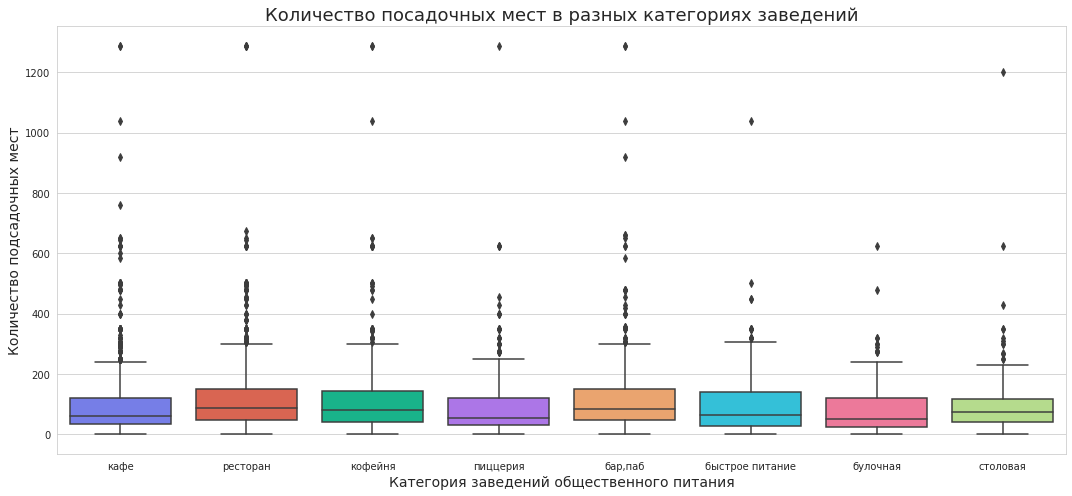

In [31]:
#устанавливаем размер
plt.figure(figsize=(15, 7))
#строим диаграмму размаха
sns.boxplot(x='category', y='seats', data=df)
#присваиваем название графика и описание по осям
plt.title('Количество посадочных мест в разных категориях заведений', fontsize=18)
plt.xlabel('Категория заведений общественного питания', fontsize=14)
plt.ylabel('Количество подсадочных мест', fontsize=14)
plt.tight_layout()
plt.show() 

Выбросы в каждой категории начинаются с разных значений, но объединяет их одно: после 700 мест выбросы становятся единичными. Ограничим график до этого значения, чтобы рассмотреть его поближе.

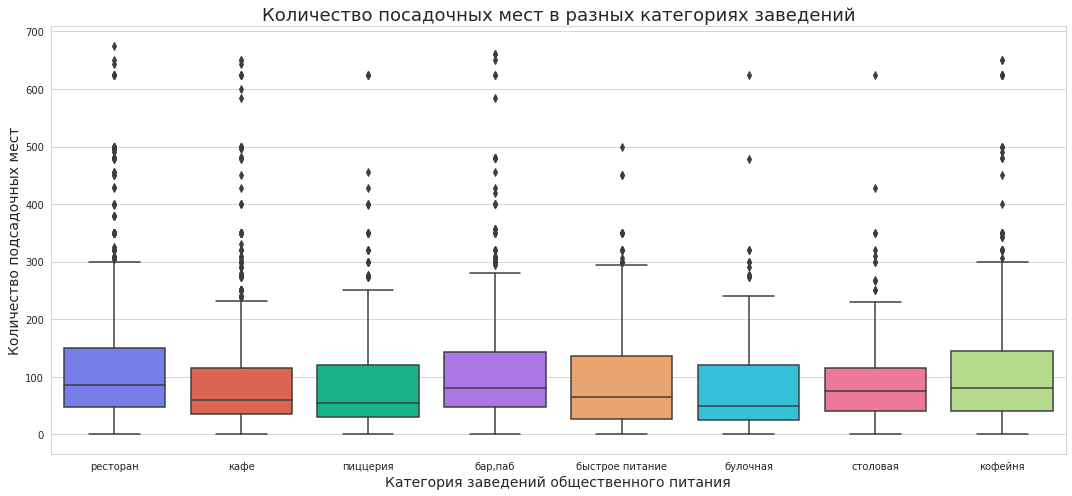

In [32]:
#устанавливаем размер
plt.figure(figsize=(15, 7))
#строим диаграмму размаха
sns.boxplot(x='category', y='seats', data=df.query('seats < 700'))
#присваиваем название графика и описание по осям
plt.title('Количество посадочных мест в разных категориях заведений', fontsize=18)
plt.xlabel('Категория заведений общественного питания', fontsize=14)
plt.ylabel('Количество подсадочных мест', fontsize=14)
plt.tight_layout()
plt.show() 

Судя по диаграмме размаха, выбросов много, но аномальные и редкие выбросы начинаются в разных диапазонах, мы можем удалить значения в разных категориях до следующего уровня:
- В кафе, ресторанах, кофейнях и барах,пабах можно оставить выбросы до 550 мест
- В заведениях быстрого питания, булочных, пиццериях и столовых до 400 мест
 
Важно помнить, что у нас есть пропуски в `seats`, а потому для удаления лишних значений воспользуемся вспомогательным столбцом, где пропуски заменим на ноль, а после устранения аномалий удалим его.

In [33]:
#обновляем индексацию датасета, создавая новый столбец с уникальными значениями
df = df.reset_index() 
#заменяем пропуски в новом столбце на 0 
df['new_seats'] = df['seats'].fillna(0)
#создаём сводные таблицы по разным категориям
debridment_1 = df.query(
    'category in ["кафе","ресторан","кофейня","бар,паб"] and new_seats > 550').pivot_table(index='index')
debridment_2 = df.query(
    'category in ["быстрое питание","булочная","столовая","пиццерия"] and new_seats > 400').pivot_table(index='index')
#удаляем аномальные выбросы с помощью индексов
df = df.query('index not in @debridment_1.index')
df = df.query('index not in @debridment_2.index')
#удаляем вспомогательные столбцы
df = df.drop(columns = ['index', 'new_seats'],axis = 1)
#обновляем индексы
df = df.reset_index(drop=True) 
#проверяем оставшийся датасет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8217 non-null   object 
 1   category           8217 non-null   object 
 2   address            8217 non-null   object 
 3   district           8217 non-null   object 
 4   hours              8217 non-null   object 
 5   lat                8217 non-null   float64
 6   lng                8217 non-null   float64
 7   rating             8217 non-null   float64
 8   price              3278 non-null   object 
 9   avg_bill           3771 non-null   object 
 10  middle_avg_bill    3112 non-null   float64
 11  middle_coffee_cup  527 non-null    float64
 12  chain              8217 non-null   object 
 13  seats              4728 non-null   float64
 14  area               8217 non-null   object 
dtypes: float64(6), object(9)
memory usage: 963.1+ KB


Первоначальный датасет уменьшился на 2,2%, при этом мы избавиись от аномальных значений в количестве посадочных мест, от заведений с размытыми адресами, от дубликатов в адресах. Помимо этого мы устранили неявные дубликаты в названиях заведений и заведение с некорректным наименованием. 

Также мы заменили пропуски в столбце **hours** с указанием времени работы заведения. Сохранены пропуски в пяти столбцах:
- **price** — категория цен в заведении
- **avg_bill** — средняя стоимость заказа в виде диапазона
- **middle_avg_bill** — средний чек 
- **middle_coffee_cup** — стоимость одной чашки капучино 
- **seats** — количество посадочных мест


- В столбце **chain** заменили значения на понятные без расшифровки. 
- А значения из столбца **district** сделали менее громоздкими в новом столбце **area**.

### Добавление новых столбцов
<a id='section_id5'></a>

#### Создаём новый столбец `street `
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>
Как правило, улица находится на втором месте в строке, значения разделены запятыми. Помним, что встречаются адреса, в которых на втором месте фигурирует "посёлок", потому нам понадобятся 2 условия, чтобы собрать улицы воедино.

In [34]:
#создаём функцию для выделения улицы
def street(address, sep=', '):
    if 'посёлок' in address:
        street = address.split(sep=sep)
        return street[2]
    else:
        street = address.split(sep=sep)
        return street[1]
#создаём столбец street
df['street'] = df['address'].apply(street)
#проверяем уникальные значения
print('Количество уникальных значений в столбце "street":', df['street'].nunique())
list(df['street'].unique()[:10])

Количество уникальных значений в столбце "street": 1408


['улица Дыбенко',
 'Клязьминская улица',
 'улица Маршала Федоренко',
 'Правобережная улица',
 'Ижорская улица',
 'Дмитровское шоссе',
 'Ангарская улица',
 'Левобережная улица',
 'МКАД',
 'Базовская улица']

Все в сборе, даже улицы из посёлка Рублёво: Новолучанская улица и улица Василия Ботылёва.

#### Создаём новый столбец `is_24/7`
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [35]:
#создаём функцию для отделения круглосуточных заведений
def round_the_clock(hours):
    if 'ежедневно, круглосуточно' in hours:
        return True
    else:
        return False 
#создаём столбец street
df['is_24/7'] = df['hours'].apply(round_the_clock)
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,area,street,is_24/7
0,Wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,Несетевое заведение,NaN,Северный,улица Дыбенко,False
1,Чeтырe Кoмнaты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,Несетевое заведение,4.0,Северный,улица Дыбенко,False
2,Хaзри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,Несетевое заведение,45.0,Северный,Клязьминская улица,False
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,Несетевое заведение,NaN,Северный,улица Маршала Федоренко,False
4,Иль Мaркo,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,Сетевое заведение,148.0,Северный,Правобережная улица,False


In [36]:
#выводим информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8217 non-null   object 
 1   category           8217 non-null   object 
 2   address            8217 non-null   object 
 3   district           8217 non-null   object 
 4   hours              8217 non-null   object 
 5   lat                8217 non-null   float64
 6   lng                8217 non-null   float64
 7   rating             8217 non-null   float64
 8   price              3278 non-null   object 
 9   avg_bill           3771 non-null   object 
 10  middle_avg_bill    3112 non-null   float64
 11  middle_coffee_cup  527 non-null    float64
 12  chain              8217 non-null   object 
 13  seats              4728 non-null   float64
 14  area               8217 non-null   object 
 15  street             8217 non-null   object 
 16  is_24/7            8217 

Добавлены новые столбцы: 
- `area` — укороченные наименования административных округов Москвы.
- `street` — названия улиц с типом object 
- `is_24/7` — заведения, работающие ежедневно и круглосуточно, с булевыми значениями

## Исследовательский анализ данных
<a id='section_id6'></a>
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

### Общий анализ заведений общественного питания
<a id='section_id7'></a>

#### Какие категории заведений представлены в данных? 
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

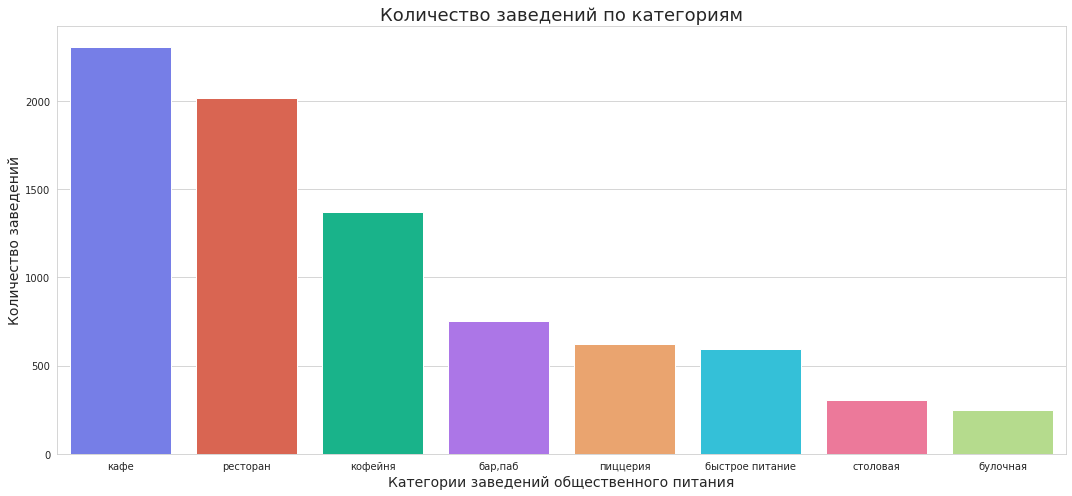

,category,name
0,кафе,2307
1,ресторан,2017
2,кофейня,1372
3,"бар,паб",751
4,пиццерия,621
5,быстрое питание,593
6,столовая,307
7,булочная,249


In [37]:
#устанавливаем размер графика
plt.figure(figsize=(15, 7)) 
#создаём столбцатый график
sns.barplot(x='category', y='name', data=(df.groupby('category').name.count().sort_values(ascending=False).reset_index()))
#присваиваем название графика и описание по осям
plt.title('Количество заведений по категориям', fontsize=18)
plt.xlabel('Категории заведений общественного питания', fontsize=14) 
plt.ylabel('Количество заведений', fontsize=14)
plt.tight_layout()
plt.show() 
#выводим таблицу
df.pivot_table(index='category', values='name', aggfunc='count').sort_values(by='name', ascending=False).reset_index()

В датасете представлено 8 категорий. Кафе преобладают над всеми прочими категориями. Меньше всего представлено булочных.

Рассмотрим распределение этих категорий на круговой диаграмме.

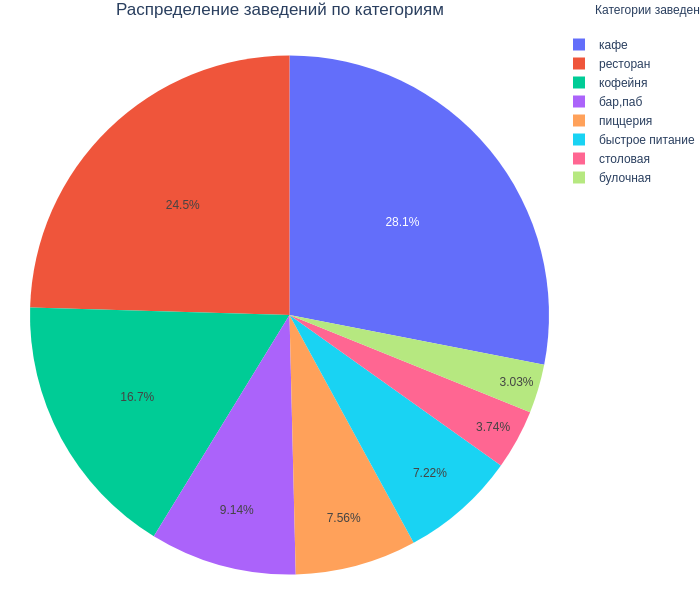

In [38]:
#группируем по категориям
group_category = df.groupby('category').name.count().sort_values(ascending=False).reset_index()
#создаём круговую диаграмму
fig = go.Figure(data=[go.Pie(labels=group_category['category'], 
                             values=group_category['name'])])
#задаём описание
fig.update_layout(title='Распределение заведений по категориям', title_x=0.4, margin=dict(l=30, r=0, t=30, b=0), 
                  width=700, height=600, annotations=[dict(x=1.32, y=1.05, text='Категории заведений', showarrow=False)])    
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=700, height=600, scale=1)
Image('figure.png')

К сожалению, сотые в дробях смазали картину — на круговой диаграмме представлены 100,05% заведений датасета :)

Если считать доли до десятичных, то общее количество данных помещается в 100%.

На круговой диаграмме видна общая тенденция: 8 имеющихся категорий можно условно разделить на 3 группы.
- Кафе, рестораны и кофейни занимают почти три четверти датасета — доли этих категорий наиболее близки друг к другу.
- Бары, пицерии и заведения быстрого питания вместе взятые не превышают долю ресторанов в датасете, но относительно друг друга близки.
- Столовые и булочные занимают менее 4% каждая — их можно выделить в третью, самую малочисленную группу.

#### Какие административные районы Москвы присутствуют в датасете? 
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

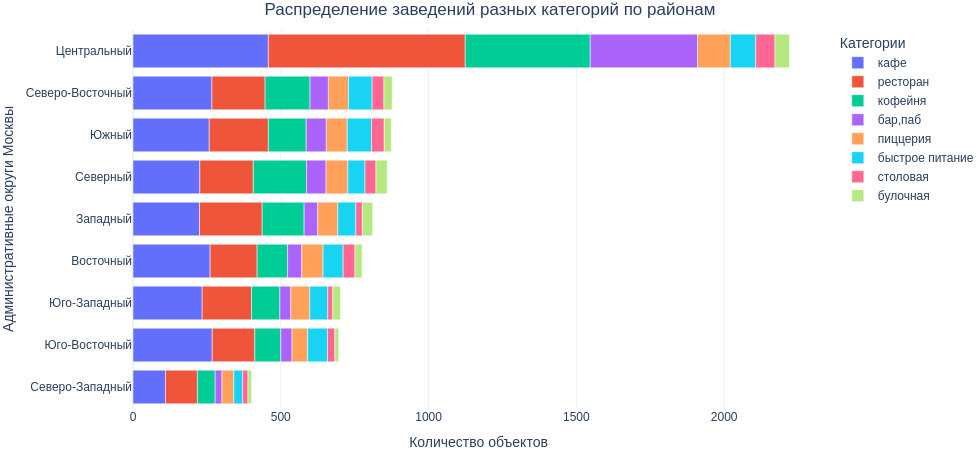

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая,Всего
Административные округи Москвы,,,,,,,,,
Центральный,363,49,86,458,423,111,666,65,2221
Северо-Восточный,62,28,80,267,152,68,180,40,877
Южный,68,24,82,258,128,71,200,43,874
Северный,66,38,58,226,180,74,181,37,860
Западный,46,35,61,225,142,68,212,22,811
Восточный,48,24,68,261,103,72,159,40,775
Юго-Западный,37,26,61,234,96,64,167,17,702
Юго-Восточный,38,13,67,268,88,53,144,25,696
Северо-Западный,23,12,30,110,60,40,108,18,401


In [39]:
#создаём сводную таблицу с общим количеством
area_total = df.pivot_table(index='area', values='address', aggfunc='count')
#создаём сводную таблицу с разделением на категории
df_area = df.pivot_table(index='area', columns='category', values='address', aggfunc='count')
df_area['Всего'] = area_total['address'] #добавляем столбец
#создаём гистограмму длинного формата
fig = px.bar(df_area.sort_values(by='Всего').reset_index(), width = 980, height = 450, template='plotly_white',
             y='area', x=['кафе','ресторан','кофейня','бар,паб','пиццерия','быстрое питание','столовая','булочная'],
             title='Распределение заведений разных категорий по районам', 
             labels={'area':'Административные округи Москвы','value':'Количество объектов','variable':'Категории'})
fig.update_layout(title_x=0.5, margin=dict(l=1, r=1, t=30, b=1)) #меняем расположение шапки
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=450, scale=1)
display(Image('figure.png'))
#выводим таблицу
df_area.index.names = ['Административные округи Москвы'] #переименовываем индекс
df_area.sort_values(by='Всего', ascending=False)

- Наибольшее количество заведний находится в `Центральном административном округе`, там преобладают рестораны, затем идут кафе и кофейни.
- Во всех остальных округах лидируют кафе, рестораны на втором месте, а кофейни — на третьем.
- В трёх административных районах распределение приблизительно похожее: `Северо-Восточный административный округ`, `Южный административный округ` и `Северный административный округ`.
- Наименьшее количество заведений в `Северо-Западном административном округе`. Кафе и ресторанов там почти поровну: 110 и 108 объектов.

#### Какое количество посадочных мест в разных категориях заведений общественного питания?
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [40]:
#создаём сводную таблицу
pivot_seats_category = (round(df.pivot_table(index='category', values='seats', aggfunc=['count','median','mean']))
                        .sort_values(by=('count','seats'), ascending=False))
pivot_seats_category.columns = ['Объектов','Медиана','В среднем'] #переименовываем столбцы
pivot_seats_category.index.names = ['Категории'] #переименовываем индекс
#выводим сводную
pivot_seats_category

,Объектов,Медиана,В среднем
Категории,,,
ресторан,1255,85.0,115.0
кафе,1203,60.0,89.0
кофейня,739,78.0,100.0
"бар,паб",458,80.0,109.0
пиццерия,421,52.0,86.0
быстрое питание,345,64.0,93.0
столовая,161,75.0,88.0
булочная,146,50.0,83.0


По сводной таблице можно заметить, как много данных по посадочным местам пропущено: 
- В датасете о `кафе` из 2308 строк есть данные о 1203 объектах.
- В категории `ресторан` — 1255 из 2017 строк.

Посмотрим распределение рейтингов на тепловой карте.

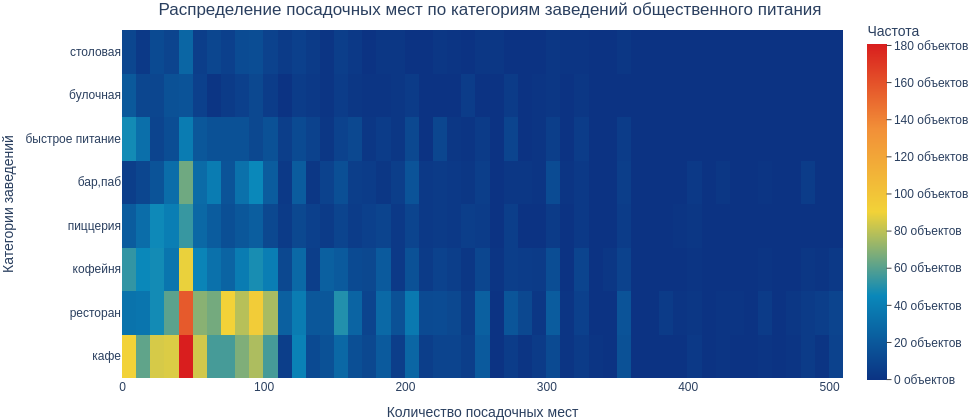

In [41]:
#создаём тепловую карту
fig = px.density_heatmap(df, x='seats', y='category', 
                         title='Распределение посадочных мест по категориям заведений общественного питания',
                         color_continuous_scale='Portland', nbinsx=100, height=420, width=980)
#описание по осям
fig.update_xaxes(title_text='Количество посадочных мест') 
fig.update_yaxes(title_text='Категории заведений')
#настройка легенды
fig.update_layout(coloraxis_colorbar=dict(title='Частота', ticksuffix=' объектов',
                                          thicknessmode='pixels', thickness=20, lenmode='pixels', len=377,
                                          yanchor='top', y=1.05, ticks='outside', dtick=20),
                  title_x=0.5, margin=dict(l=1, r=1, t=30, b=1))
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=420, scale=1)
Image('figure.png')

Почти у всех категорий заведений наибольшее количество объектов с диапазоном посадочных мест от 40 до 49, исключением являются заведения быстрого питания и булочные: у них популярнее диапазон 0-9 посадочных мест.
- У `кафе` есть 3 основных пика: 91 заведение с посадочными местами до 10, после 59 посадочных мест количество заведений становится меньше, к диапазону 90-99 мест количество кафе увеличивается, а затем в увеличеснием посадочных мест количество заведений начинает снижаться.
- В `ресторанов` первый и максимальный пик на диапазоне 40-49, второй и третий — на 70-79 и 90-99. Можно обратить внимание, что в этой категории пика до 9 посадочных мест нет, хотя такие присутствуют, возможно, речь о заведениях, работающих исключительно на доставку. Ресторанов такого рода меньше, чем кафе и кофеен.
- У `кофеен` тоже три основных пика, но они менее выражены (что может быть связано и с уменьшением общего количества заведений в этой категории, почти в 2 раза относительно кафе): самый высокий пик на всё том же диапазоне 40-49, а также до 9 и на 90-99.
- У `пиццерий` есть два пика: 20-29 посадочных мест в 46 случаях и 40-49 в 54 заведений. Весьма выражены ещё 23 пиццерии с количеством посадочных мест от 90 до 99, после чего количество объектов с большей посадкой начинает уменьшаться.
- У `баров и пабов` почти нет заведений с малым количсетвом посадочных мест: всего 6 до 9 посадочных мест, зато есть выразительные пики на 40-49, 60-69, 90-99 и 120-129 — и после этого всё равно встречаются бары с большим количеством посадочных мест, вплоть до 489.
- У заведений `быстрого питания` самый высокий пик на диапазоне до 9 посадочных мест, таких объектов 47, можно предположить, это точки без посадки, а второй пик на диапазоне 40-49, после чего выразительных пиков больше нет.
- В `столовых` наибольшее распределение посадочных мест от 20 до 99, с пиком на 40-49.
- В `булочных` основной пик приходится на заведения с посадочными местами до 9, есть пик и на 40-49, также есть некоторое количество булочных, где может разместиться до 329 посетителей. 

Рассмотрим средние и медианные значения рейтингов на графике.

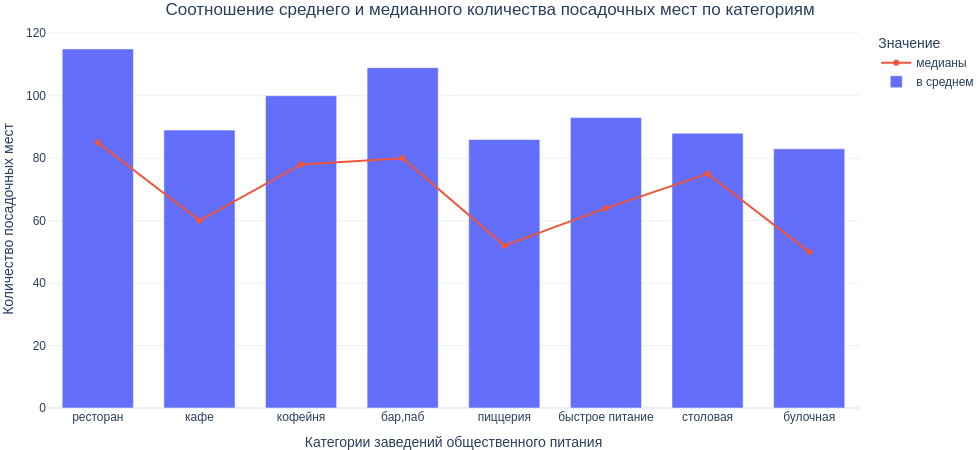

In [42]:
#создаём линейный график по медианным значениям
fig = px.line(x=pivot_seats_category.reset_index()['Категории'], y=pivot_seats_category.reset_index()['Медиана'], 
              color=px.Constant('медианы'), markers=True, color_discrete_sequence=['#EF553B'], template='plotly_white',  
              title='Соотношение среднего и медианного количества посадочных мест по категориям',
              labels=dict(x='Категории заведений общественного питания', y='Количество посадочных мест', color='Значение'),
              height=450, width=980)
#добавляем к нему столбчатый график по средним значениям
fig.add_bar(x=pivot_seats_category.reset_index()['Категории'], y=pivot_seats_category.reset_index()['В среднем'], 
            name='в среднем', width=0.7, marker_color='#636EFA')
fig.update_layout(title_x=0.5, margin=dict(l=1, r=1, t=30, b=1)) #меняем расположение шапки
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=450, scale=1)
Image('figure.png')

Пропуски могут смазать картину по категориям. Однако всё это не мешает нам проанализировать информацию по имеющимся данным:
- Так и среднее и медианное значение говорит нам, что в `ресторанах`, как правило, посадочных мест больше, чем во всех остальных категориях.
- На втором месте по среднему и медианному значениям посадочных мест идут `бары и пабы`.
- Закрывают тройку лидеров по посадочным местам `кофейни`.
- Меньше всего посадочных мест и в среднем, и по медианному значению — у `булочных`.

#### Какие рейтинги в разных категориях заведений?
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

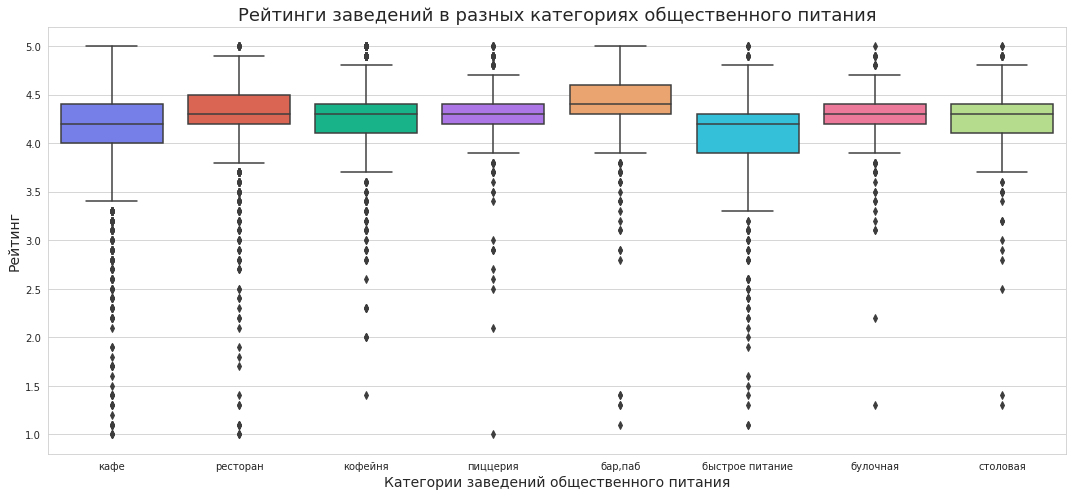

In [43]:
plt.figure(figsize=(15, 7)) #устанавливаем размер
#создаём график диаграммы размаха
sns.boxplot(x='category', y='rating', data=df)
#присваиваем название графика и описание по осям
plt.title('Рейтинги заведений в разных категориях общественного питания', fontsize=18)
plt.xlabel('Категории заведений общественного питания', fontsize=14)
plt.ylabel('Рейтинг', fontsize=14)
plt.tight_layout()
plt.show() 

При изучении диаграмм размаха по категориям можно заметить любопытный факт: низкие оценки есть во всех категориях, но среди кофеен, пиццерий, баров, булочных и столовых выбросов в сторону низких оценок меньше, чем у других. Впрочем, на максимальном рейтинге нет выбросов только в категориях `кафе` и `бар`, что говорит о том, что там высокие оценки не являются большой редкостью. 

У интересующей заказчика категории `кофейня` оценки в по большей части варьируются от 3.7 до 4.8 — весьма неплохой показатель, среди выбросов есть и максимальный рейтинг 5, а минимальный — 1.4, низкий, но не единица.

Рассмотрим средние рейтинги на графике.

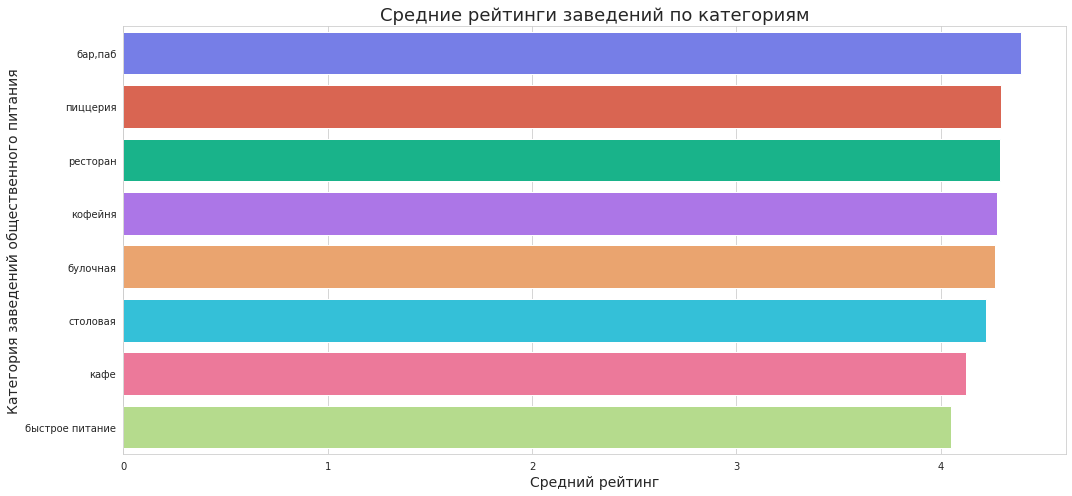

,mean,median,count
category,,,
"бар,паб",4.4,4.4,751
пиццерия,4.3,4.3,621
ресторан,4.3,4.3,2017
кофейня,4.3,4.3,1372
булочная,4.3,4.3,249
столовая,4.2,4.3,307
кафе,4.1,4.2,2307
быстрое питание,4.0,4.2,593


In [44]:
plt.figure(figsize=(15, 7)) #устанавливаем размер
#создаём столбчатый график
sns.barplot(y='category', x='rating', data=(df.groupby('category').rating.mean().sort_values(ascending=False).reset_index()))
#присваиваем название графика и описание по осям
plt.title('Средние рейтинги заведений по категориям', fontsize=18)
plt.ylabel('Категория заведений общественного питания', fontsize=14)
plt.xlabel('Средний рейтинг', fontsize=14)
plt.tight_layout()
plt.show()
#выводим сводную таблицу
round(df.groupby('category').rating.agg(['mean','median','count']).sort_values(by=['mean'], ascending=False),1)

В среднем самые высокие рейтинги у баров, а самые низкие — и заведений быстрого питания. При этом, все оценки не очень далеко ушли друг от друга, средние значения колеблются от 4.4 до 4.

Но если сравнить с медианными значениями, мы можем увидеть, что у половины заведений оценки равны среднему значению, а у столовых, кафе и заведений быстрого питания выше среднего.

#### Какая есть зависимость времени работы заведений от расположения и их категорий?
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

Прежде, чем мы приступим к расчётам, важно вспомнить, что в группу заведений, не работающих ежедневно и круглосуточно, попадают и те объекты общественного питания, в которых о времени работы мы ничего не знаем. При замене пропусков в столбце `hours` мы использовали `unknown`. Для расчёта корректной доли круглосуточных заведений на основании известных данных, объекты без указанного времени работы мы выделим отдельно.

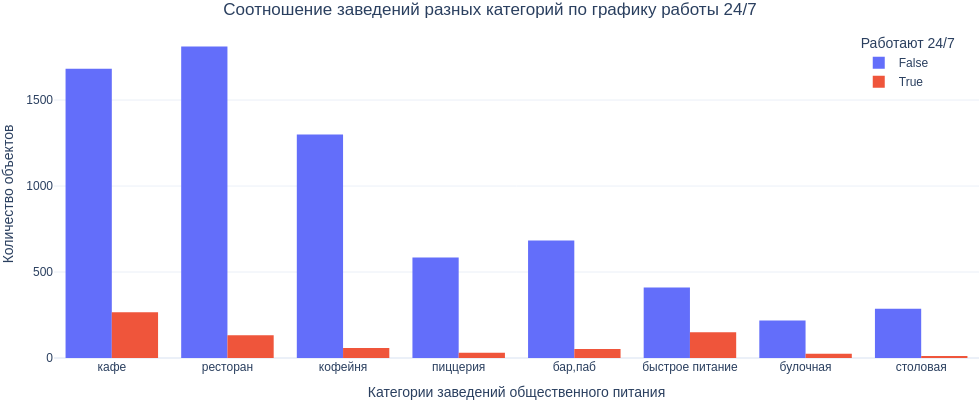

,Не работают 24/7,Работают 24/7,Пропущено,Доля 24/7,Всего объектов
Категории,,,,,
быстрое питание,443,150,33,26.8,593
кафе,2041,266,359,13.7,2307
булочная,225,24,7,9.9,249
"бар,паб",699,52,15,7.1,751
ресторан,1884,133,72,6.8,2017
пиццерия,590,31,5,5.0,621
кофейня,1314,58,14,4.3,1372
столовая,295,12,9,4.0,307


In [45]:
#создаём столбчатый график
fig = px.histogram(df.query('hours != "unknown"'), x='category', color='is_24/7', barmode='group',
                   height=400, template='plotly_white', title='Соотношение заведений разных категорий по графику работы 24/7',
                   labels={'category':'Категории заведений общественного питания','is_24/7':'Работают 24/7'})
#указываем описание по оси y
fig.update_yaxes(title_text='Количество объектов') 
#изменяем положение легенды
fig.update_layout(legend=dict(yanchor="top", y=1, xanchor="left", x=0.87), title_x=0.5, margin=dict(l=1, r=1, t=30, b=1))
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=400, scale=1)
display(Image('figure.png'))

#находим заведения без указанного времени работы по категориям
working_hours_unknown = df.query('hours == "unknown"').pivot_table(index='category', values='address', aggfunc='count')
#создаём сводную таблицу с временем работы по категориям
working_hours = df.pivot_table(index='category', columns='is_24/7', values='address', aggfunc='count')
working_hours.columns = ['Не работают 24/7','Работают 24/7'] #переименовываем столбцы
working_hours.index.names = ['Категории'] #переименовываем индекс
#добавляем объекты без указанного времени работы
working_hours['Пропущено'] = working_hours_unknown['address'] 
#высчитываем долю заведений, работающих круглосуточно
working_hours['Доля 24/7'] = round((working_hours['Работают 24/7'] * 100 / 
                                    (working_hours['Работают 24/7'] + 
                                     working_hours['Не работают 24/7'] - working_hours['Пропущено'])),1) 
#считаем общее количество объектов в датасете
working_hours['Всего объектов'] = working_hours['Работают 24/7'] + working_hours['Не работают 24/7']
#выводим таблицу
working_hours.sort_values(by='Доля 24/7', ascending=False)

Большая часть заведений во всех категориях не работает круглосуточно каждый день
- Наибольшая доля круглосуточных заведений приходится на объекты `быстрого питания` — больше четверти в этой категории.
- Меньше всего заведений, работающий 24/7, относительно общего количества объектов с известным графиком работы, приходится на `столовые` и `кофейни`.
- По количеству работающих круглосуточно в целом, преобладают `кафе`, в этой же категории и самое большое количество заведений без указания графика работы.

Рассмотрим на солнечной диаграмме соотношение заведений с разным графиком работы по административным районам Москвы и разделением на категории. 

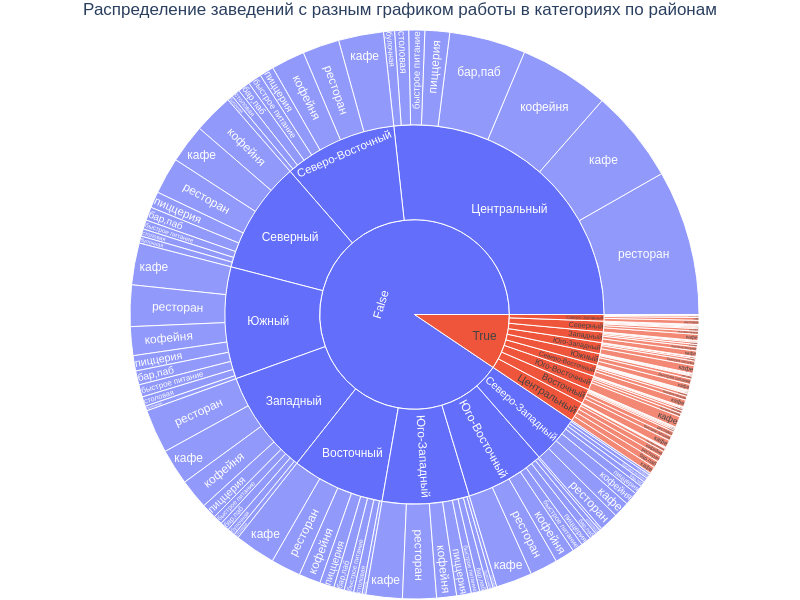

In [46]:
#создаём солнечный график по срезу объектов с известным графиков работы
fig = px.sunburst((df.query('hours != "unknown"')
                   .pivot_table(index=['area','is_24/7','category'], values='address', aggfunc='count')
                   .reset_index()), 
                  path=['is_24/7','area','category'], values='address')
fig.update_layout(title='Распределение заведений с разным графиком работы в категориях по районам', width=800, height=550,
                  title_x=0.5, margin=dict(l=30, r=1, t=30, b=1))
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=800, height=600, scale=1)
Image('figure.png')

При детальном рассмотрении графика о распределении объектов с круглосуточной работой, можно заметить следующее:
- В `Центральном административном округе` наибольшее количество объектов, работающих 24/7, а также более равномерное распределение круглосуточных заведений по всем категориям: количество кафе, баров, ресторанов и кофеен с таким графиком работы приблизительно равно — от 30 до 25 объектов. Заведений быстрого питания 14 штук.
- `Юго-Восточный административный округ` разительно отличается от прочих районов большим количеством круглосуточных кафе.
- В 6 округах заведений быстрого питания больше 14 объектов на район: `Южный`, `Восточный`, `Юго-Западный`, `Западный`, `Северо-Восточный` и `Юго-Восточный`.

### Анализ сетевых заведений общественного питания
<a id='section_id8'></a>

#### Какое соотношение сетевых и несетевых заведений в датасете?
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

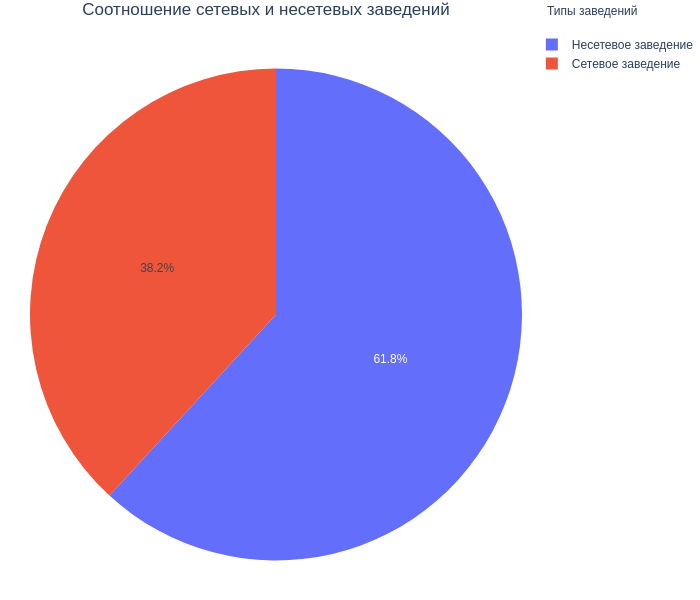

,chain,name
0,Несетевое заведение,5081
1,Сетевое заведение,3136


In [47]:
#группируем датасет по наличию сети
group_chain = df.groupby('chain').name.count().sort_values(ascending=False).reset_index()
#создаём круговую диаграмму
fig = go.Figure(data=[go.Pie(labels=group_chain['chain'], 
                             values=group_chain['name'])]) 
#задаём описание
fig.update_layout(title='Соотношение сетевых и несетевых заведений', width=700, height=550, 
                  title_x=0.38, margin=dict(l=30, r=1, t=30, b=1),
                  annotations=[dict(x=1.24, y=1.05, text='Типы заведений', showarrow=False)])
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=700, height=600, scale=1)
display(Image('figure.png'))
#выводим таблицу
group_chain

Почти две трети заведений в датасете несетевые.

#### Какие категории заведений чаще являются сетевыми? 
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

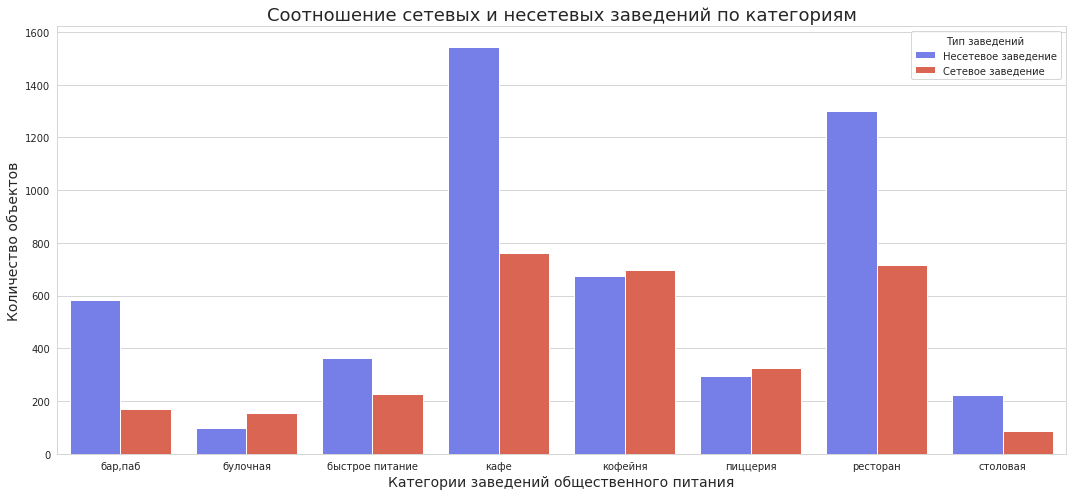

chain,Несетевое заведение,Сетевое заведение,Доля сетей
Категории,,,
булочная,96,153,61.4
пиццерия,296,325,52.3
кофейня,675,697,50.8
быстрое питание,365,228,38.4
ресторан,1300,717,35.5
кафе,1544,763,33.1
столовая,222,85,27.7
"бар,паб",583,168,22.4


In [48]:
plt.figure(figsize=(15, 7)) #устанавливаем размер
#строим график
sns.barplot(data=(df.pivot_table(index=['chain','category'], values='name', aggfunc='count').reset_index()), 
            x='category', y='name', hue='chain')
#присваиваем название графика и описание по осям
plt.xlabel('Категории заведений общественного питания', fontsize=14)
plt.ylabel('Количество объектов', fontsize=14)
plt.title('Соотношение сетевых и несетевых заведений по категориям', fontsize=18)
plt.legend(fontsize=10, title='Тип заведений')
plt.tight_layout()
plt.show() 

#создаём сводную таблицу
category_chain = df.pivot_table(index='category', columns='chain', values='name', aggfunc='count')
#добавляем столбец с долей сетевых заведений
category_chain['Доля сетей'] = round((category_chain['Сетевое заведение'] * 100 / 
                                                  (category_chain['Несетевое заведение'] + 
                                                   category_chain['Сетевое заведение'])),1) 
category_chain.index.names = ['Категории'] #переименовываем индекс
#сортируем по долям сетевых заведений
category_chain.sort_values('Доля сетей', ascending=False)

- Больше сетевых заведений среди `булочных` — 61,4%. 
- На втором и третьем месте — `пиццерии` и `кофейни`. Объекты в обеих категориях более, чем в половине случаев, являются сетевыми.
- Наибольшее количество несетевых заведений среди `баров`: 168 против 583.

#### Какое количество посадочных мест в сетевых заведениях наиболее распространено?
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

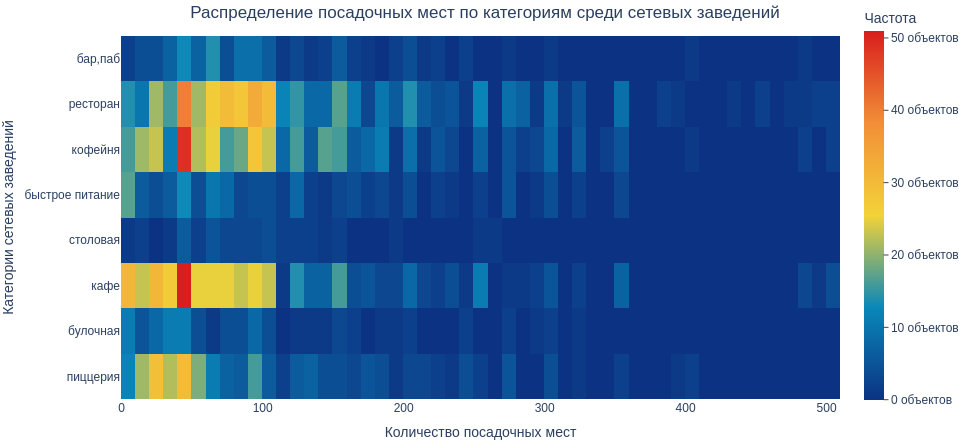

In [49]:
#создаём тепловую карту
fig = px.density_heatmap(df.query('chain == "Сетевое заведение"'), x='seats', y='category', 
                         title='Распределение посадочных мест по категориям среди сетевых заведений',
                         color_continuous_scale='Portland', nbinsx=100, height=440, width=970)
#описание по осям
fig.update_xaxes(title_text='Количество посадочных мест') 
fig.update_yaxes(title_text='Категории сетевых заведений')
#настройка легенды
fig.update_layout(coloraxis_colorbar=dict(title='Частота', ticksuffix=' объектов', 
                                          thicknessmode='pixels', thickness=20, lenmode='pixels', len=410,
                                          yanchor='top', y=1.1, ticks='outside', dtick=10),
                  title_x=0.5, margin=dict(l=0, r=0, t=30, b=0))
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=970, height=440, scale=1)
Image('figure.png')

На этой тепловой карте отчётливо видно следующее:
- У трёх категорий заведений диапазон 40-49 самый популярный: `рестораны`, `кофейни` и `кафе`, при этом в последних двух это самые выраженные пиковые значения. Кроме того, у этих категорий очень распространена посадка до 109 мест.
- Наибольшее количество посадочных мест до 9, а скорее всего, вообще без посадки - в категории `кафе`, также с минимальным количеством посадочных мест много заведений в категориях `ресторан`, `кофейня`, `быстрое питание`, `булочная` и `пиццерия`. У `баров` и `столовых` среди сетевых заведений почти нет объектов с малым количеством посадочных мест.
- Среди сетевых `пиццерий` наиболее популярны заведения с диапазонами 20-29 и 40-49 посадочных мест.
- Среди сетевых заведий категорий `ресторан` и `кофейня` немало объектов, в которых больше 109 посадочных мест в заведении.

#### Какие сети заведений общественного питания самые популярные в Москве?
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>
Под популярностью понимается количество заведений этой сети в регионе. Выделим 15 самых популярных сетей и рассмотрим их поближе.

In [50]:
#выделяем топ-15 сетей
top_15 = (df.query('chain == "Сетевое заведение"')
          .pivot_table(index='name', values='address', aggfunc='count')
          .sort_values(by='address', ascending=False)
          .head(15))
#разделяем сети по категориям с подсчётом количества заведений в каждой
top_15_category = (df.query('name in @top_15.index')
                   .pivot_table(index=['name','category'], values='address', aggfunc='count'))
top_15_category.columns = ['Кол-во объектов'] #переименовываем столбец
#считаем заведения с посадочными местами и их медианное значение
top_15_seats = (df.query('name in @top_15.index')
                .pivot_table(index=['name','category'], values='seats', aggfunc=['count','median']))
top_15_seats.columns = ['Указано посад.мест', 'Медиан.посад.мест'] #переименовываем столбцы
#считаем средний рейтинг в каждой категории сети
top_15_rating = round((df.query('name in @top_15.index')
                       .pivot_table(index=['name','category'], values='rating', aggfunc='mean')),1)
#объединяем сводные таблицы
top_15_category['Указано посад.мест'] = top_15_seats['Указано посад.мест']
top_15_category['Медиан.посад.мест'] = top_15_seats['Медиан.посад.мест']
top_15_category['Ср.рейтинг'] = top_15_rating['rating']
top_15_category

Кол-во объектов  \
name                                category                           
Cofefest                            кафе                           1   
                                    кофейня                       32   
Cofix                               кофейня                       64   
One Price Coffee                    кофейня                       71   
Prime                               кафе                           1   
                                    ресторан                      49   
Бухaнкa                             булочная                      25   
                                    кафе                           1   
                                    кофейня                        6   
Дoдo Пиццa                          пиццерия                      73   
Дoминo'C Пиццa                      пиццерия                      77   
Кoфeпoрт                            кофейня                       42   
Кулинaрнaя Лaвкa Брaтьeв Кaрaвaeвых кафе                          38   
Му Му                               бар,паб                        1   
                                    быстрое питание                2   
                                    кафе                          12   
                                    кофейня                        2   
                                    пиццерия                       1   
                                    ресторан                       8   
                                    столовая                       1   
Тeрeмoк                             быстрое питание                2   
                                    ресторан                      36   
Хинкaльнaя                          бар,паб                        3   
                                    быстрое питание                6   
                                    кафе                          19   
                                    ресторан                      15   
                                    столовая                       1   
Чaйхaнa                             быстрое питание                2   
                                    кафе                          26   
                                    ресторан                       9   
Шoкoлaдницa                         кафе                           1   
                                    кофейня                      117   
Яндeкc Лaвкa                        ресторан                      68   

                                                     Указано посад.мест  \
name                                category                              
Cofefest                            кафе                              0   
                                    кофейня                          10   
Cofix                               кофейня                          36   
One Price Coffee                    кофейня                          52   
Prime                               кафе                              1   
                                    ресторан                         32   
Бухaнкa                             булочная                          6   
                                    кафе                              0   
                                    кофейня                           3   
Дoдo Пиццa                          пиццерия                         61   
Дoминo'C Пиццa                      пиццерия                         62   
Кoфeпoрт                            кофейня                          23   
Кулинaрнaя Лaвкa Брaтьeв Кaрaвaeвых кафе                             26   
Му Му                               бар,паб                           1   
                                    быстрое питание                   1   
                                    кафе                              9   
                                    кофейня                           1   
                                    пиццерия                          1   
                                

Как можно увидеть на этой сводной таблице, в 8 из 15 популярных сетей несколько категорий заведений под единым именем. От категории к категории отличаются средние рейтинги и медианное количество посадочных мест в рамках одной сети. Визуализируем распределение на графике.

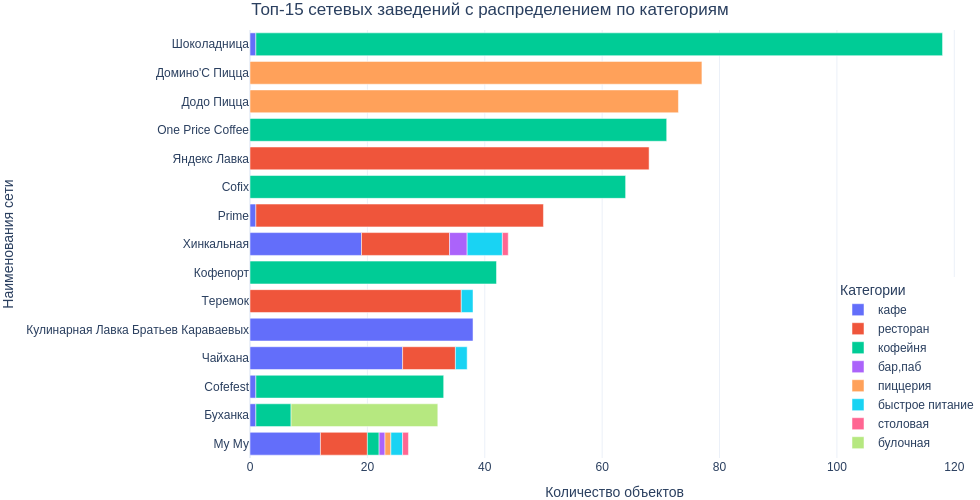

In [51]:
#создаём сводную таблицу с общим количеством заведений 
chain_15_total = (df.query('name in @top_15.index').pivot_table(index='name', values='address',aggfunc='count'))
#создаём сводную с разбивкой по категориям
chain_15 = (df.query('name in @top_15.index').pivot_table(index='name', columns='category',values='address',aggfunc='count'))
chain_15['Всего'] = chain_15_total['address'] #добавляем столбец
#создаём гистограмму длинного формата
fig = px.bar(chain_15.sort_values(by='Всего').reset_index(), 
             width=980, height=500, template='plotly_white',
             y='name', x=['кафе','ресторан','кофейня','бар,паб','пиццерия','быстрое питание','столовая','булочная'],
             title='Топ-15 сетевых заведений с распределением по категориям', 
             labels={'name':'Наименования сети','value':'Количество объектов','variable':'Категории'})
#изменяем положение легенды
fig.update_layout(legend=dict(yanchor='bottom',y=0,xanchor='right',x=1),title_x=0.5,margin=dict(l=1, r=1, t=30, b=1))
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=500, scale=1)
Image('figure.png')

Анализируя график, можно заметить следующее:
- Среди самых крупных сетей преобладают `кофейни`. 
- Самой крупной сетью является `Шоколадница`.
- На втором месте пиццерии `Дoминo'с Пиццa` и `Дoдo Пиццa`
- В датасете 7 крупных сетей с одной категорией.
- Некоторые сети используют один бренд для различных категорий, лидером среди таких сетей можно назвать `Му-Му`.
- Единственная крупная сеть в датасете владеет `булочными` — `Буханка`.
- У 6 сетей есть заведения в категории `ресторан`.
- У 8 сетей есть объекты в категории `кафе`.
- Заведений `быстрого питания` и `столовых`у крупных сетей крайне мало, последние есть только у сетей под брендами `Хинкальная` и `Му-Му`. И лишь у этих двух крупных сетей среди заведений есть `бары и пабы`.

Можно предположить, что в график попали не все заседения сети, если было принято решение использовать для разных категорий разные наименования. Например, в сети ресторанов могут быть разные направления — и каждый из них могут вести под разными брендами. Также в одну сеть могут попасть разные компании, если они используют франшизу, например, Шоколадница: под одним брендом могут быть открыты кофейни с разными владельцами, по сути, каждый владелец может расширить свою сеть, но для обывателя она будет общей, не отличаясь от конкурентов по франшизе.

Также можно предположить, что некоторые объекты не являются крупными сетями: Чайхана и Хинкальная может состоять из нескольких объектов в сети, но обладая популярными и обобщёнными именами, попадает в нашу выборку, это может объяснить и разные категории под одним наименованием.

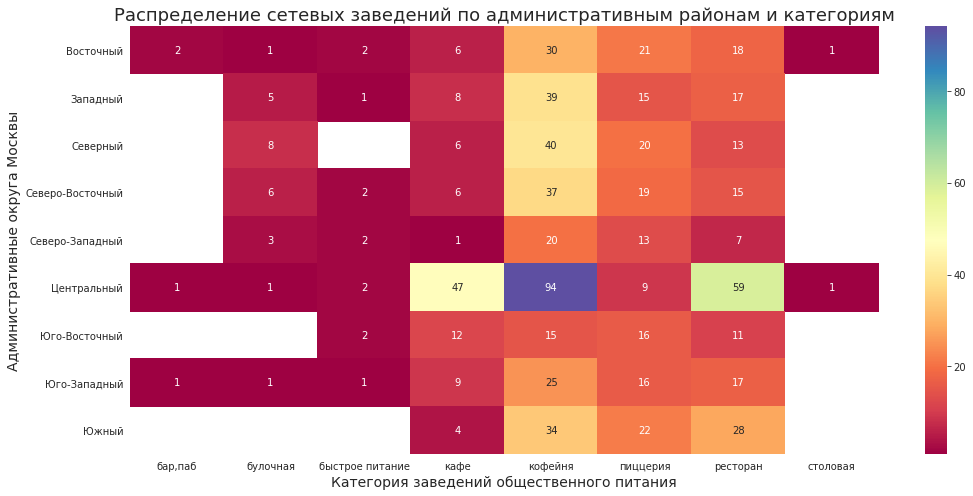

In [52]:
#создаём таблицу с общим количеством по срезу популярных сетей
chain_15_district_total = df.query('name in @top_15.index').pivot_table(index='area', values='address', aggfunc='count')
#устанавливаем размер графика
plt.figure(figsize=(15, 7)) 
#создаём тепловую карту библиотекой seaborn
sns.heatmap((df.query('name in @top_15.index')
             .pivot_table(index='area', columns='category', values='address', aggfunc='count')),
            xticklabels=list(df['category'].sort_values().unique()), yticklabels=list(df['area'].sort_values().unique()),
            annot=True, cmap='Spectral')
#присваиваем название графика и описание по осям
plt.title('Распределение сетевых заведений по административным районам и категориям', fontsize=18)
plt.xlabel('Категория заведений общественного питания', fontsize=14) 
plt.ylabel('Административные округа Москвы', fontsize=14)
plt.tight_layout()
plt.show() 

- Большая часть объектов из топ-15 популярных сетей распологаются в `Центральном административном округе`, большинство из них — кофейни.
- Меньше всего заведений общественного питания, входящих в самые популярные сети, в `Северо-Западном административном округе`. 

### Анализ расположения заведений общественного питания
<a id='section_id9'></a>

#### На каких улицах наибольшее количество заведений общественного питания?
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

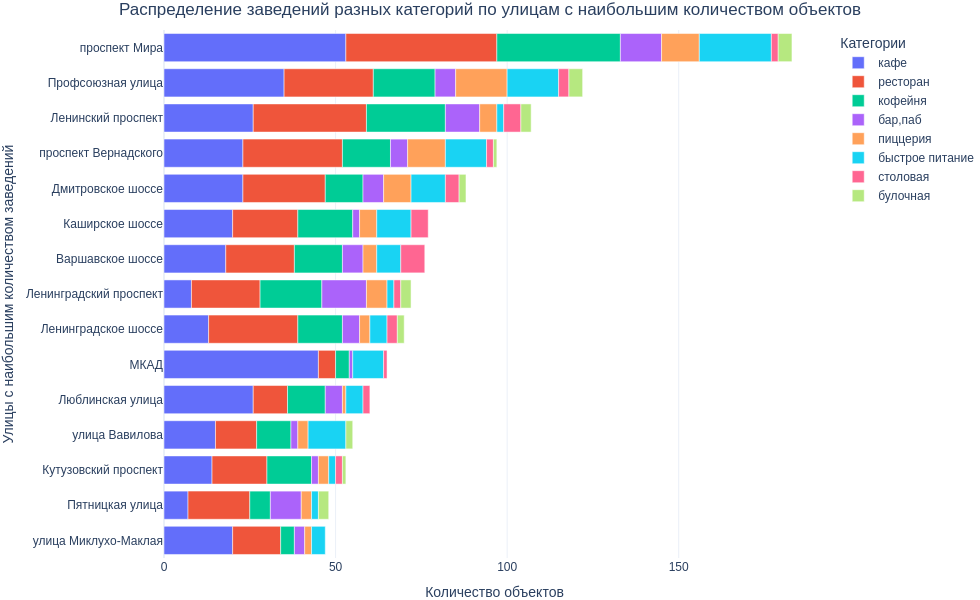

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая,Всего
Топ-15 улиц,,,,,,,,,
проспект Мира,12.0,4.0,21.0,53.0,36.0,11.0,44.0,2.0,183
Профсоюзная улица,6.0,4.0,15.0,35.0,18.0,15.0,26.0,3.0,122
Ленинский проспект,10.0,3.0,2.0,26.0,23.0,5.0,33.0,5.0,107
проспект Вернадского,5.0,1.0,12.0,23.0,14.0,11.0,29.0,2.0,97
Дмитровское шоссе,6.0,2.0,10.0,23.0,11.0,8.0,24.0,4.0,88
Каширское шоссе,2.0,NaN,10.0,20.0,16.0,5.0,19.0,5.0,77
Варшавское шоссе,6.0,NaN,7.0,18.0,14.0,4.0,20.0,7.0,76
Ленинградский проспект,13.0,3.0,2.0,8.0,18.0,6.0,20.0,2.0,72
Ленинградское шоссе,5.0,2.0,5.0,13.0,13.0,3.0,26.0,3.0,70


In [53]:
#создаём сводную с индексами 15 самых популярных улиц и общим количеством заведений
street_15 = (df.pivot_table(index='street', values='address', aggfunc='count')
             .sort_values(by='address', ascending=False).head(15))
#создаём сводную по улицам топ-15 с разделением на категории
street_pivot = (df.query('street in @street_15.index')
            .pivot_table(index='street', columns='category',values='address', aggfunc='count'))
street_pivot['Всего'] = street_15['address'] #добавляем столбец с общим
#создаём гистограмму длинного формата
fig = px.bar(street_pivot.sort_values(by='Всего').reset_index(), width=980, height=600, template='plotly_white',
             y='street', x=['кафе','ресторан','кофейня','бар,паб','пиццерия','быстрое питание','столовая','булочная'],
             title='Распределение заведений разных категорий по улицам с наибольшим количеством объектов', 
             labels={'street':'Улицы с наибольшим количеством заведений',
                     'value':'Количество объектов','variable':'Категории'})
fig.update_layout(title_x=0.5, margin=dict(l=1, r=1, t=30, b=1)) #меняем расположение шапки
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=600, scale=1)
display(Image('figure.png'))
street_pivot.index.names = ['Топ-15 улиц'] #переименовываем индекс
#выводим таблицу
street_pivot.sort_values(by='Всего', ascending=False)

- Наибольшее количество заведений общественного питания находится на `проспекте Мира`: больше всего кафе, затем с небольшим отрывом следуют рестораны и кофейни, также на проспекте расположено немалое количество заведений быстрого питания.
- В соотношении ко всем заведениям по одной улице, наибольшая доля кафе располагается на `МКАДе`, прочих категорий там представлено крайне мало.

**Выясним, в каких округах есть заведения с самых популярных улиц.**

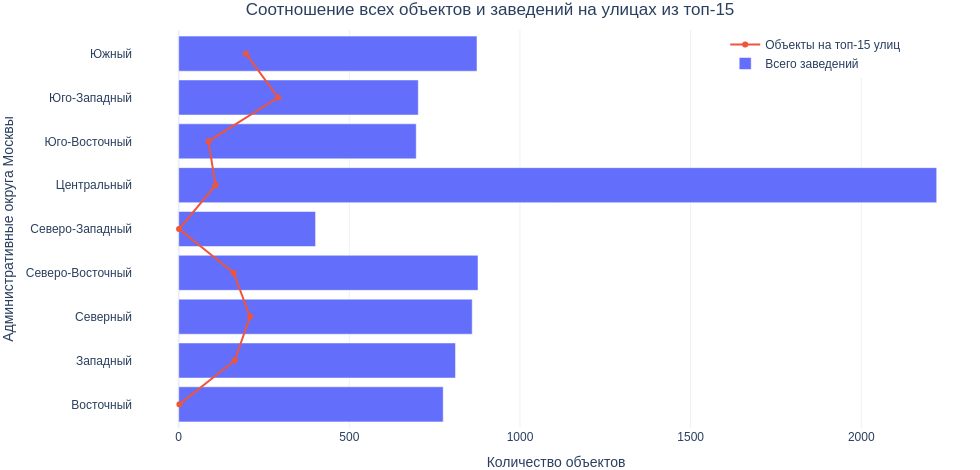

,Объектов на топ-15 улиц,Всего,Доля
Административные округа Москвы,,,
Юго-Западный,291,702,41.5
Северный,209,860,24.3
Южный,197,874,22.5
Западный,164,811,20.2
Северо-Восточный,161,877,18.4
Центральный,108,2221,4.9
Юго-Восточный,87,696,12.5
Восточный,2,775,0.3
Северо-Западный,1,401,0.2


In [54]:
#создаём переменную с общим количеством заведений по округам
area_street_total = df.query('street in @street_15.index').pivot_table(index='area', values='address', aggfunc='count')
area_street_total.columns = ['Объектов на топ-15 улиц'] #переименовываем столбец
area_street_total['Всего'] = df_area['Всего'] #добавляем общее количество заведений до среза
#считаем долю
area_street_total['Доля'] = round((area_street_total['Объектов на топ-15 улиц'] * 100 / area_street_total['Всего']),1)  
area_street_total.index.names = ['Административные округа Москвы'] #переименовываем индекс
#создаём линейный график с заведениями на топ-15 улиц
fig = px.line(y=area_street_total.reset_index()['Административные округа Москвы'], 
              x=area_street_total.reset_index()['Объектов на топ-15 улиц'], 
              color=px.Constant('Объекты на топ-15 улиц'), 
              markers=True, color_discrete_sequence=['#EF553B'], template='plotly_white',  
              title='Соотношение всех объектов и заведений на улицах из топ-15',
              labels=dict(y='Административные округа Москвы', x='Количество объектов', color=''), height=470, width=980)
#добавляем к нему столбчатый график с общим количеством заведений по районам
fig.add_bar(y=area_street_total.reset_index()['Административные округа Москвы'], x=area_street_total.reset_index()['Всего'], 
            orientation ='h', name='Всего заведений', width=0.8, marker_color='#636EFA')
#изменяем положение легенды
fig.update_layout(legend=dict(yanchor="top", y=1, xanchor="left", x=0.7), title_x=0.5, margin=dict(l=1, r=1, t=30, b=1))
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=470, scale=1)
display(Image('figure.png'))
#выводим сводную с сортировкой
area_street_total.sort_values(by='Объектов на топ-15 улиц', ascending=False)

По графику и сводной таблице видно следующее:
- `Юго-Западный административный округ` собрал в себе наибольшее количество заведений с самых заполненных объектами общественного питания улиц, треть от всех заведений в этом административном районе.
- С небольшим отрывом друг от друга следуют `Северный` и `Северо-Восточный` административные округа — в противоположном конце Москвы.
- В `Северо-Западном административном округе` и `Восточном административном округе` меньше всего объектов с самых насыщенных заведениями общественного питания улиц.
- `Центральный административный округ` имеет наименьшую долю заведений на популярных улицах, не считая два обозначенных выше административных района.

#### Найдём улицы, на которых находится только один объект общепита
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [55]:
#находим улицы с одним заведением
min_places = df.pivot_table(index='street', values='address', aggfunc='count').sort_values(by='address').query('address == 1')
#выводим размеры таблицы по срезу с 1 заведением на улице
df.query('street in @min_places.index').shape

(438, 17)

В датасете 438 улиц, на которых по одному заведению, рассмотрим, как они распределяются по округам и категориям.

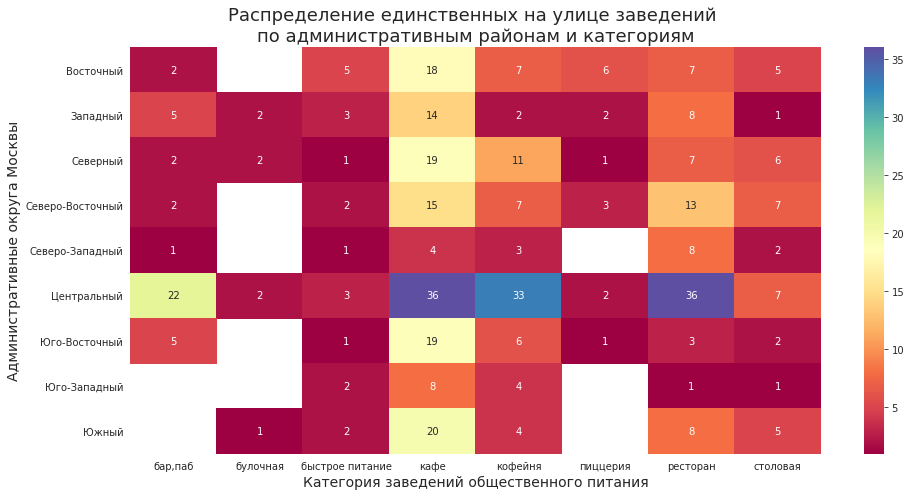

In [56]:
#создаём переменную с общим количеством заведений по округам
min_street_total = df.query('street in @min_places.index').pivot_table(index='area', values='address', aggfunc='count')
#устанавливаем размер графика
plt.figure(figsize=(14, 7))
#создаём тепловую карту библиотекой seaborn
sns.heatmap((df.query('street in @min_places.index')
             .pivot_table(index='area',columns='category', values='address', aggfunc='count')),
            xticklabels=list(df['category'].sort_values().unique()), yticklabels=list(df['area'].sort_values().unique()),
            annot=True, cmap='Spectral')
#присваиваем название графика и описание по осям
plt.title('Распределение единственных на улице заведений \nпо административным районам и категориям', fontsize=18)
plt.xlabel('Категория заведений общественного питания', fontsize=14) 
plt.ylabel('Административные округа Москвы', fontsize=14)
plt.tight_layout()
plt.show()

- Наибольшее количество улиц с одним заведением на ней в `Центральном административном округе`. По категориям лидируют кафе, рестораны, кофейни и бары.
- Во всех районах, кроме `Северо-Западного административного округа`, на улицах с одним объектом общепита преобладают кафе.
- Меньше всего улиц с одним заведением общественного питания — в `Юго-Западном административном округе`. 

**Рассмотрим рейтинги в этих заведениях.**

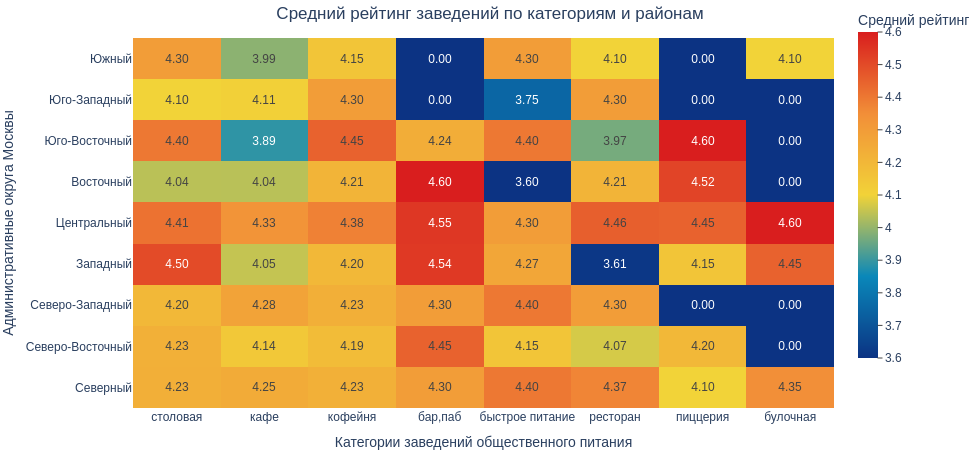

In [57]:
#создаём тепловую карту библиотекой plotly
fig = px.density_heatmap(df.query('street in @min_places.index'), 
                         x='category', y='area', z='rating', histfunc='avg', text_auto='.2f',
                         title='Средний рейтинг заведений по категориям и районам',
                         color_continuous_scale='Portland', height=450, width=980)
#описание по осям
fig.update_xaxes(title_text='Категории заведений общественного питания') 
fig.update_yaxes(title_text='Административные округа Москвы')
#настройка легенды
fig.update_layout(coloraxis_colorbar=dict(title='Средний рейтинг', ticksuffix='',
                                          thicknessmode='pixels', thickness=20, lenmode='pixels', len=367,
                                          yanchor='top', y=1.1, ticks='outside', dtick=0.1), 
                  title_x=0.5, margin=dict(l=1, r=1, t=30, b=1))
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=450, scale=1)
Image('figure.png')

Так как не во всех районах присутствует весь перечень категорий по улицам с одним заведением, тепловая карта библиотеки `plotly` подсветила пропуски минимальным средним рейтингом из таблицы: 
- Минимальные рейтинги есть в `Восточном административном округе` по категории `быстрого питания`, а в `Западном административном округе` в категории `ресторан`.

В целом же мы можем увидеть следующее:
- Самые высокий средний рейтинг по категориям `бар, паб`, `пиццерия` и `булочная` в `Восточном`, `Юго-Восточном` и `Центральном` административных округах соответственно.
- Также высокие средние рейтинги — 4.5 и выше — в `барах` `Центрального` и `Западного` административных округах, у `пиццерий` `Восточного административного округа` и `столовых` `Западного`.
- Так как заказчика интересует открытие `кофейни`, обратим внимание на средние рейтинги у единичных заведений на улице: они самые высокие у `кофеен` в `Юго-Восточном` округе — 4.45, судя по предыдущей таблице, их там всего 6. Следующими в списке средних рейтингов идут `кофейни` из `Центрального административного округа`.

Таким образом можно сказать, что среди районов с единичными по улице заведениями, наиболее привлекательные `Центральный`, `Юго-Восточный` и `Западный` административные округа. 

#### Как удалённость от центра влияет на цены в заведениях?
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>
Значения средних чеков заведений хранятся в столбце middle_avg_bill. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Рассчитаем медианные и средние значения этого столбца для каждого района.

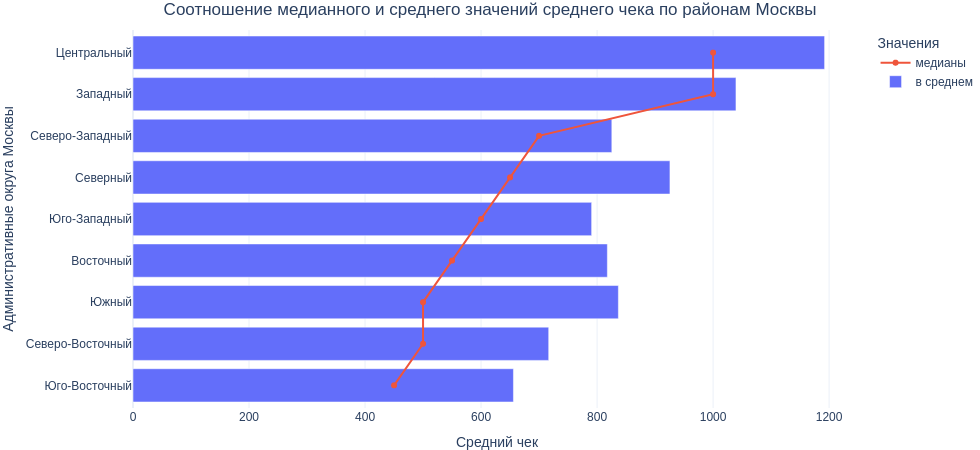

,В среднем,Медиана,Объекты с ценой,Всего объектов,Доля
Административные округа Москвы,,,,,
Западный,1039.4,1000.0,299,811,36.9
Центральный,1192.2,1000.0,1052,2221,47.4
Северо-Западный,825.4,700.0,156,401,38.9
Северный,925.6,650.0,311,860,36.2
Юго-Западный,790.6,600.0,234,702,33.3
Восточный,817.7,550.0,256,775,33.0
Северо-Восточный,716.6,500.0,301,877,34.3
Южный,836.7,500.0,310,874,35.5
Юго-Восточный,655.8,450.0,193,696,27.7


In [58]:
#создаём сводную таблицу с сортировкой по количеству объектов с указанной средней ценой
df_middle_avg_bill = round(df.groupby('area').middle_avg_bill.agg(['mean', 'median','count'])
                           .sort_values(by=['median']),1)
df_middle_avg_bill.columns = ['В среднем','Медиана','Объекты с ценой'] #переименовываем столбцы
df_middle_avg_bill['Всего объектов'] = df_area['Всего'] #добавляем общее количество заведений
df_middle_avg_bill['Доля'] = round((df_middle_avg_bill['Объекты с ценой'] * 100 / df_middle_avg_bill['Всего объектов']),1)
df_middle_avg_bill.index.names = ['Административные округа Москвы'] #переименовываем индекс
#создаём линейный график с заведениями на топ-15 улиц
fig = px.line(y=df_middle_avg_bill.reset_index()['Административные округа Москвы'], 
              x=df_middle_avg_bill.reset_index()['Медиана'], 
              color=px.Constant('медианы'), markers=True, color_discrete_sequence=['#EF553B'], template='plotly_white',  
              title='Соотношение медианного и среднего значений среднего чека по районам Москвы',
              labels=dict(y='Административные округа Москвы', x='Средний чек', color='Значения'), width=980, height=450)
#добавляем к нему столбчатый график с общим количеством заведений по районам
fig.add_bar(y=df_middle_avg_bill.reset_index()['Административные округа Москвы'], 
            x=df_middle_avg_bill.reset_index()['В среднем'], 
            orientation ='h', name='в среднем', width=0.8, marker_color='#636EFA')
fig.update_layout(title_x=0.5, margin=dict(l=1, r=1, t=30, b=1)) #меняем расположение шапки
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=450, scale=1)
display(Image('figure.png'))
#выводим сводную таблицу
df_middle_avg_bill.sort_values(by=['Медиана'], ascending=False)

Как мы можем увидеть по медианным значениям:
- Самый высокий средний чек в `Центральном` и `Западном` административных округах — 1000 рублей, в последнем выбросов значительно меньше, так как медианное и среднее значения очень близки.
- Самый низкий средний чек в `Юго-Восточном административном округе` — 450 рублей. Однако стоит учесть, что в этой районе известна наименьшая доля средних цен по всем заведениям.

## Общий вывод
<a id='section_id10'></a>
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

- В имеющемся датасете представлены 8 категорий, из которых самыми многочисленными являются кафе, рестораны и кофейни, в сумме на их долю приходится почти 70% всех данных.
- Большая часть заведений общественного питания расположены в Центральном административном округе.
- Самая распространённое количество посадочных мест приходится на диапазон 40-49 мест в заведении, в некоторых категориях большое количество объектов с минимальным количеством посадочных мест. При этом есть немало объектов с большой вместимостью. Из-за чего в трёх самых распространённых категориях среднее количество мест варьируется от 115 до 89.
- В среднем рейтинги в рассматриваемом датасете варьируются от 4 до 4.4, учитывая близкое к нему медианное значение, можно утверждать, что объективная оценка.
- Большинство заведений общественного питания не работают 24/7, среди круглосуточных заведений в Центральном административном округе наиболее ровное распределением их по категориям. В остальных районах как правило преобладают кафе, но на долю круглосуточных заведений больше всего приходится объектов категории быстрого питания.
- Большая часть заведений не относится к сетевым. Чаще всего сетевыми бывают булочные, пиццерии и кофейни. Среди сетевых заведений усиливается разделение объектов, работающих на вынос, и тех, где количество посадочных мест доходит до 109 с пиковыми значениями в диапазоне 40-49.
- Самой популярной сетью является франшиза Шоколадницы, на которую приходится 117 кофеен. Из 10 самых крупных сетей на категорию кофеен приходится 4 бренда, 3 сети ресторанов и 2 пиццерии.
- Большая часть сетевых заведений приходится на Центральный административный район.
- В срезе данных по количеству заведений общепита, самой популярной у владельцев является проспект Мира: из самых многочисленных категорий на него приходится 53 кафе, 44 ресторана и 36 кофеен.
- Наибольшее количество улиц с единственным заведением общественного питания находится в Центральном административном округе со средним рейтингом от 4.3 до 4.6, что выше среднего рейтинга по всем заведениям.
- Средний чек в Центральном административном округе также один из самых высоких, лучшими показателями может похвастаться только Западный административный округ — там разница между средним и медианным значениями среднего чека наименьшая.

## Детализируем исследование: открытие кофейни
<a id='section_id11'></a>
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве. Будем считать, что заказчики не боятся конкуренции в этой сфере, ведь кофеен в больших городах уже достаточно. Проанализируем, насколько осуществима мечта клиентов об открытии такой несетевой кофейни.

**Выделим в отдельную переменную информацию о всех кофейнях датасета.**

In [59]:
coffeehouse = (df.query('category == "кофейня"')
               [['name','lat','lng','district','area','street','rating','price',
                 'middle_coffee_cup','seats','chain','is_24/7','hours']])
coffeehouse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 3 to 8211
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1372 non-null   object 
 1   lat                1372 non-null   float64
 2   lng                1372 non-null   float64
 3   district           1372 non-null   object 
 4   area               1372 non-null   object 
 5   street             1372 non-null   object 
 6   rating             1372 non-null   float64
 7   price              469 non-null    object 
 8   middle_coffee_cup  513 non-null    float64
 9   seats              739 non-null    float64
 10  chain              1372 non-null   object 
 11  is_24/7            1372 non-null   bool   
 12  hours              1372 non-null   object 
dtypes: bool(1), float64(5), object(7)
memory usage: 140.7+ KB


Также для углубления анализа нам может пригодиться новая категоризация кофеен по уровню их конкуренции относительно друг друга, в зависимости от их расположения. Так как навык владения кодом пока недостаточно хорош и вычленить уровень конкуренции по количеству заведений в радиусе не получится, будем использовать знакомую по общему анализу логику: 
- К кофейням с высокой конкуренцией отнесём те заведения, которые находятся на улицах с наибольшим их количеством
- С низкой конкуренцией причислим объекты на улице с одной кофейней (там могут быть и другие категории заведений общественного питания, но кофейня — не бар или пиццерия, так что их мы в расчёт брать не будем)
- Все остальные кофейни попадут в группу со средней конкуренцией

**Посмотрим, какое количество кофеен приходится на улицы.**

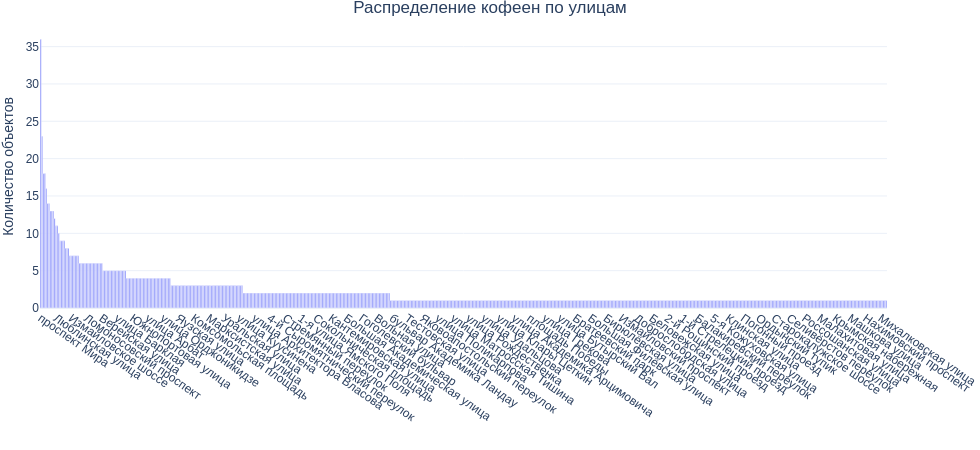

In [60]:
#строим столбчатую диаграмму 
fig = px.bar((coffeehouse.pivot_table(index='street', values='name', aggfunc='count')
              .sort_values(by='name', ascending=False).reset_index()), 
             x='street', y='name', width=980, height=450, template='plotly_white',
             title='Распределение кофеен по улицам', labels={'name':'Количество объектов','street':''})
fig.update_xaxes(tickangle=35)
fig.update_layout(title_x=0.5, margin=dict(l=1, r=1, t=25, b=1)) #меняем расположение шапки
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=450, scale=1)
Image('figure.png')

На графике можно увидеть, что после 7 кофеен на улице начинается более плавное снижение к меньшему количеству объектов на улицах. Обозначим как минимальное для высокой конкуренции скопление кофеен на одной улице — до 7.

In [61]:
#создаём сводную таблицу с индексами 15 самых популярных улиц и количеством кофеен на них
coffeehouse_street_15 = (coffeehouse.pivot_table(index='street', values='name', aggfunc='count')
             .sort_values(by='name', ascending=False).query('name > 6'))
#создаём сводную с индексами улиц, на которых располагается 1 кофейня
coffeehouse_street_1 = (coffeehouse.pivot_table(index='street', values='name', aggfunc='count').query('name == 1'))
#создаём функцию для разделения кофеен по уровню конкуренции
def competing(row):
    if row['street'] in coffeehouse_street_15.index:
        return 'высокая'
    elif row['street'] in coffeehouse_street_1.index:
        return 'низкая'
    else:
        return 'средняя'
#применяем функцию    
coffeehouse['competing'] = coffeehouse.apply(competing, axis = 1)
#проверяем результат
coffeehouse.head()

,name,lat,lng,district,area,street,rating,price,middle_coffee_cup,seats,chain,is_24/7,hours,competing
3,Dormouse Coffee Shop,55.881608,37.488860,Северный административный округ,Северный,улица Маршала Федоренко,5.0,NaN,170.0,NaN,Несетевое заведение,False,"ежедневно, 09:00–22:00",средняя
44,9 Bar Coffee,55.885837,37.513422,Северный административный округ,Северный,Коровинское шоссе,4.0,NaN,NaN,46.0,Сетевое заведение,False,пн-пт 08:00–18:00,средняя
45,Cofefest,55.879934,37.492522,Северный административный округ,Северный,улица Маршала Федоренко,3.6,NaN,NaN,NaN,Сетевое заведение,False,пн-пт 09:00–19:00,средняя
51,Cofix,55.878531,37.479395,Северный административный округ,Северный,улица Дыбенко,3.8,NaN,NaN,NaN,Сетевое заведение,False,"ежедневно, 08:00–22:00",низкая
52,Royal Coffee,55.880622,37.448529,Северный административный округ,Северный,Правобережная улица,3.1,NaN,NaN,148.0,Несетевое заведение,False,"ежедневно, 10:00–22:00",низкая


Для анализа кофеен мы оставили 13 столбцов с данными, которые позволят нам изучить особенности этой категории, и добавили 1 новый:
- `name` — название кофейни
- `lat` — широта географической точки, в которой находится заведение
- `lng` — долгота географической точки, в которой находится заведение
- `district` — административный район, в котором находится кофейня
- `area` — короткий формат наименований административных районов
- `street` — улица, на которой находится кофейня
- `rating` — рейтинг кофеен по оценкам пользователей в Яндекс Картах
- `price` — категория цен в заведении
- `middle_coffee_cup` — стоимость или медиана стоимости одной чашки капучино
- `seats` — количество посадочных мест
- `chain` — сетевое или несетевое заведение
- `is_24/7` — кофейни, работающие ежедневно и круглосуточно (булев тип)
- `hours` — информация о днях и часах работы
- `competing` — уровень конкуренции кофеен относительно их расположения

Итого:
- Мы будем рассматривать датасет, состоящий из 1372 кофеен
- Категории цен указаны по 469 объектам
- Стоимость одной чашки капучино известна в 513 заведениях
- Количество посадочных мест известно в 739 случаях

### В каких районах больше всего кофеен, каковы особенности их расположения?
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

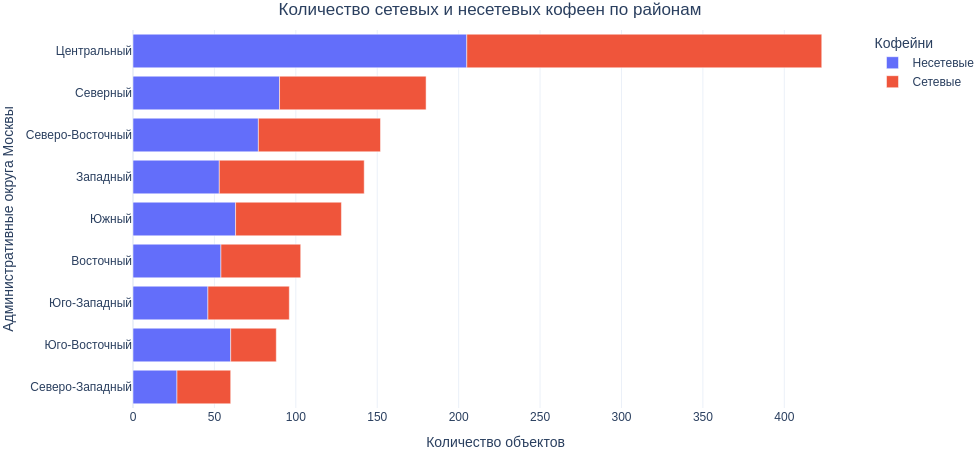

,Несетевые,Сетевые,Всего,Доля несетевых
Административные округа Москвы,,,,
Юго-Восточный,60,28,88,68.2
Восточный,54,49,103,52.4
Северо-Восточный,77,75,152,50.7
Северный,90,90,180,50.0
Южный,63,65,128,49.2
Центральный,205,218,423,48.5
Юго-Западный,46,50,96,47.9
Северо-Западный,27,33,60,45.0
Западный,53,89,142,37.3


In [62]:
#создаём сводную таблицу с разделением на отношению к сети
ch_area = coffeehouse.pivot_table(index='area', columns='chain', values='name', aggfunc='count')
ch_area.columns = ['Несетевые','Сетевые'] #переименовываем столбцы
ch_area['Всего'] = ch_area['Несетевые'] + ch_area['Сетевые'] #считаем общее количество
ch_area['Доля несетевых'] = round((ch_area['Несетевые'] * 100 / ch_area['Всего']),1) #высчитываем долю несетевых
ch_area.index.names = ['Административные округа Москвы'] #переименовываем индекс
#создаём гистограмму длинного формата
fig = px.bar(ch_area.sort_values(by='Всего').reset_index(), x=['Несетевые','Сетевые'], y='Административные округа Москвы',
             width=980, height=450, template='plotly_white', title='Количество сетевых и несетевых кофеен по районам',
             labels={'value':'Количество объектов','variable':'Кофейни'})
fig.update_layout(title_x=0.5, margin=dict(l=1, r=1, t=30, b=1)) #меняем расположение шапки
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=450, scale=1)
display(Image('figure.png'))
#выводим таблицу с сортировкой
ch_area.sort_values(by='Доля несетевых', ascending=False)

- Больше всего кофеен располагается в `Центральном административном округе`. 
- Меньше всего кофеен в `Северо-Западном административном округе`.
- Доля сетевых заведений при этом выше 50% в пяти районах.
- Самая малая доля несетевых заведений приходится на `Западный административный округ`.
- Несетевых заведений больше всего в `Юго-Восточном административном округе`, при этом по общему количеству кофеен этот район на предпоследнем месте в списке.
- В `Северном административном округе` количество сетевых и несетевых кофеен равно: по 90 заведений.

Рассмотрим, какие места более популярны для размещения кофеен: там, где высокая конкуренция и количество кофеен на улице наибольшее, улицы, где есть только одна кофейня, или улицы со средней конкуренцией. Помимо уровня конкуренции, выведем разделение кофеен на сетевые и несетевые.

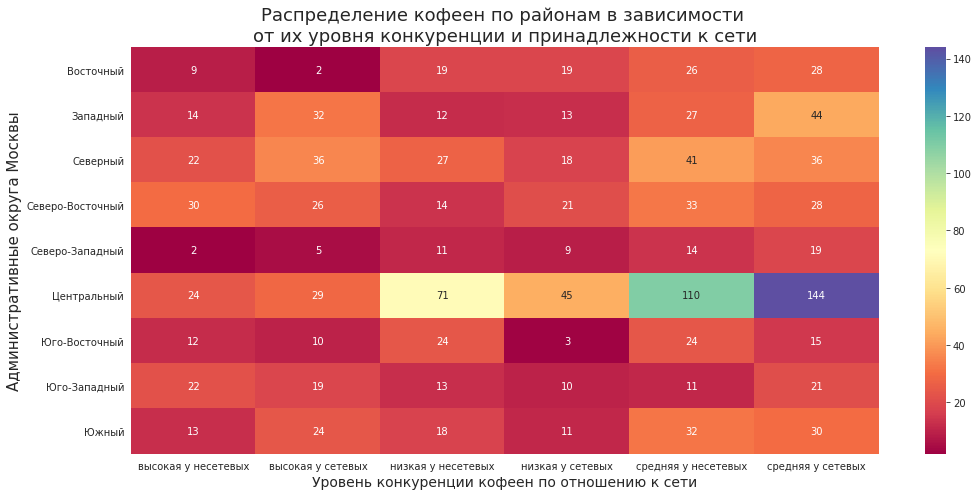

In [63]:
values = ['высокая у несетевых','высокая у сетевых','низкая у несетевых','низкая у сетевых',
          'средняя у несетевых','средняя у сетевых']
plt.figure(figsize=(15, 7)) #устанавливаем размер
#создаём тепловую карту библиотекой seaborn
sns.heatmap(coffeehouse.pivot_table(index='area', columns=['competing','chain'], values='name', aggfunc='count'),
            xticklabels=values, 
            yticklabels=list(coffeehouse['area'].sort_values().unique()),
            annot=True, fmt='.0f', cmap='Spectral')
#присваиваем название графика и описание по осям
plt.title('Распределение кофеен по районам в зависимости \nот их уровня конкуренции и принадлежности к сети', fontsize=18)
plt.xlabel('Уровень конкуренции кофеен по отношению к сети', fontsize=14) 
plt.ylabel('Административные округа Москвы', fontsize=15)
plt.tight_layout()
plt.show() 

На тепловом графике становится более отчётливо видно распределение не только среди сетевых и несетевых кофеен, но уровень конкуренции между ними:
- В `Центральном административном округе` преобладают кофейни со средней конкуренцией: сетевых среди таких объектов больше, чем несетевых, а вот в группе кофеен с низкой конкуренцией ситуация меняется — и несетевые кофейни встречаются чаще. Наименьшее количество кофеен в этом районе у несетевых заведений с высокой конкуренцией.
- В `Северном административном округе` наибольшее количество кофеен со средней конкуренцией среди несетевых заведений, а затем идут сети с высокой и средней конкуренцией. С низкой конкуренцией в этом районе меньше всего кофеен у сетей.
- В `Западном административном округе` при любом виде конкуренции преобладают сетевые кофейни: больше всего их среди средней, затем идёт высокая, а с низкой конкуренцией несетевых заведений меньше всего на один объект.
- В `Южном административном округе` преобладают несетевые заведения со средней и низкой конкуренцией. Сетевых кофеен с низкой конкуренцией меньше всего в этом районе.
- В `Восточном административном округе` сетевых и несетевых кофеен с низкой конкуренцией равное количество, со средней — с небольшим отрывом преобладают сетевые заведения, а с высокой — чаще встречаются несетевые кофейни.

### Есть ли круглосуточные кофейни?
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

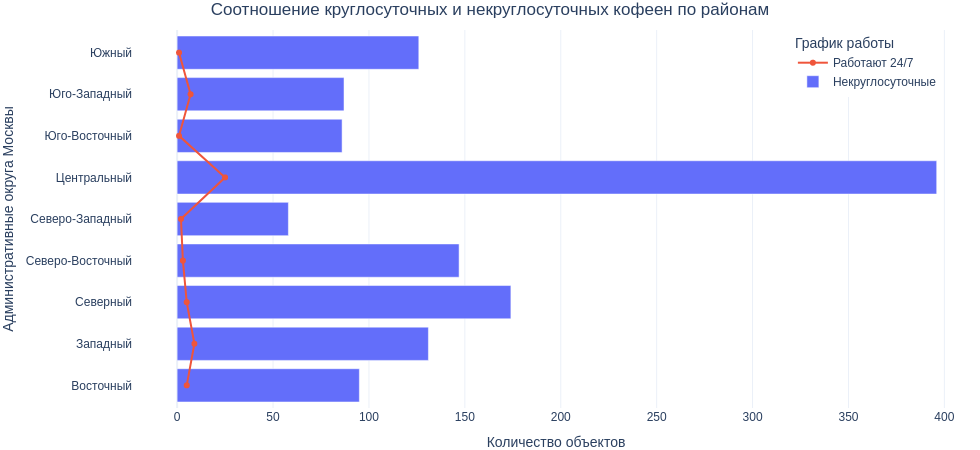

,Не работают 24/7,Работают 24/7,Доля 24/7
Административные округа Москвы,,,
Юго-Западный,87,7,7.4
Западный,131,9,6.4
Центральный,396,25,5.9
Восточный,95,5,5.0
Северо-Западный,58,2,3.3
Северный,174,5,2.8
Северо-Восточный,147,3,2.0
Юго-Восточный,86,1,1.1
Южный,126,1,0.8


In [64]:
#создаём сводную таблицу по округам
ch_working_hours = (coffeehouse.query('hours != "unknown"') #отсеиваем данные с пропусками
                    .pivot_table(index='area', columns='is_24/7', values='name', aggfunc='count'))
ch_working_hours.columns = ['Не работают 24/7','Работают 24/7'] #переименовываем столбцы
ch_working_hours.index.names = ['Административные округа Москвы'] #переименовываем индекс
#считаем долю круглосуточных кофеен
ch_working_hours['Доля 24/7'] = round((ch_working_hours['Работают 24/7'] * 100 / 
                                      (ch_working_hours['Работают 24/7'] + ch_working_hours['Не работают 24/7'])),1)
#создаём линейный график 
fig = px.line(x=ch_working_hours.reset_index()['Работают 24/7'], 
              y=ch_working_hours.reset_index()['Административные округа Москвы'], 
              color=px.Constant('Работают 24/7'), markers=True, color_discrete_sequence=['#EF553B'], template='plotly_white',  
              title='Соотношение круглосуточных и некруглосуточных кофеен по районам',
              labels=dict(y='Административные округа Москвы', x='Количество объектов', color='График работы'), 
              width=980, height=450)
#добавляем к нему столбчатый график с общим количеством заведений по районам
fig.add_bar(y=ch_working_hours.reset_index()['Административные округа Москвы'], 
            x=ch_working_hours.reset_index()['Не работают 24/7'], 
            orientation ='h', name='Некруглосуточные', width=0.8, marker_color='#636EFA')
#изменяем положение легенды
fig.update_layout(legend=dict(yanchor="top", y=1, xanchor="left", x=0.78), title_x=0.5, margin=dict(l=1, r=1, t=30, b=1))
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=450, scale=1)
display(Image('figure.png'))
#выводим сводную таблицу с сортировкой по доле
ch_working_hours.sort_values(by='Доля 24/7', ascending=False)

Среди кофеен очень мало круглосуточных заведений. По всем районам их доля не превышает 10%.
- В целом наибольшее количество объектов с режимом работы 24/7 находится в `Центральном административном округе`: там 25 подобных кофеен.
- Самая большая доля — в `Юго-Западном административном округе`: 7,4% относительно всех кофеен в этом районе.

Можно предположить, что изначально открывать круглосуточную кофейню нет большой необходимости, увеличить же рабочее время до поздних часов можно будет после выявления окупаемости нового заведения.

### Какие у кофеен рейтинги? Как они распределяются по районам?
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

Кофейни могут разделяться по разным критериям:
- В каком они располагаются районе
- Принадлежат заведения к сети или нет 
- Какой уровень конкуренции у кофейни
- Какой у них график работы

**Расмотрим рейтинги у сетевых и несетевых заведений на диаграмме размаха с разделением по районам Москвы.**

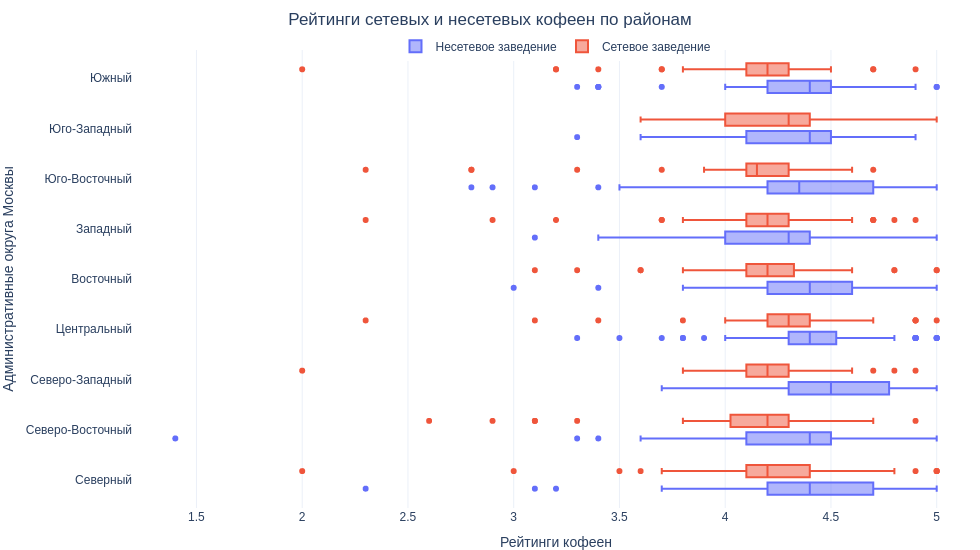

In [65]:
#строим диаграмму размаха библиотекой plotly
fig = px.box(coffeehouse, y='area', x='rating', color='chain', 
             template='plotly_white', width=980, height=550,
             title='Рейтинги сетевых и несетевых кофеен по районам',
             labels={'area':'Административные округа Москвы',
                     'rating':'Рейтинги кофеен','chain':''})
#изменяем положение легенды
fig.update_layout(legend=dict(orientation='h', xanchor='center', x=0.5, y=1.04), 
                  title_x=0.5, margin=dict(l=1, r=1, t=50, b=1))
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=550, scale=1)
Image('figure.png')

При рассмотрении сравнительных диаграмм размаха рейтингов кофеен по районам, можно отметить, что медиана у всех несетевых заведений выше, чем у кофеен, принадлежащих к сети. Есть предположение, что при открытии уникальной кофейни без франшизы, можно с большой вероятностью снискать высокий рейтинг от посетителей. Важно отметить:
- Наибольшая разница меданных рейтингов между сетевыми и несетевыми кофейнями наблюдается в `Северо-Западном административном округе`: 4,2 против 4,5.
- Наименьшая разница — в `Западном`, `Юго-Западном` и `Центральном` административных округах: она составляет 0,1 между медианой рейтингов сетевых и несетевых кофеен.

**Рассмотрим средние рейтинги по районам с разделением не только на отношение к сети, но и на уровень конкуренции, а также в зависимости от графика работы.** Несетевые кофейни выделим в оформлении графиков дополнительно.

Кроме того создадим вспомогательный график с количеством заведений в каждой группе кофеен, чтобы объективно оценить, по какому количеству объектов выводились средние значения.

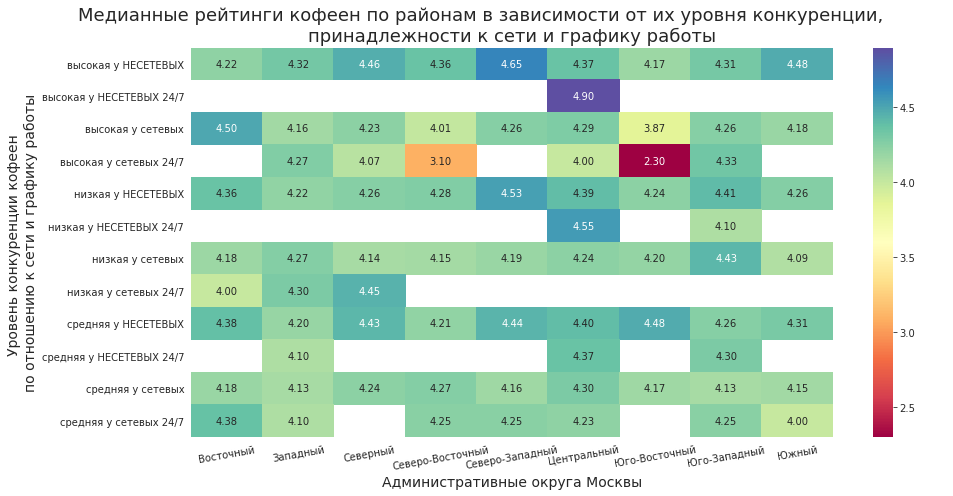

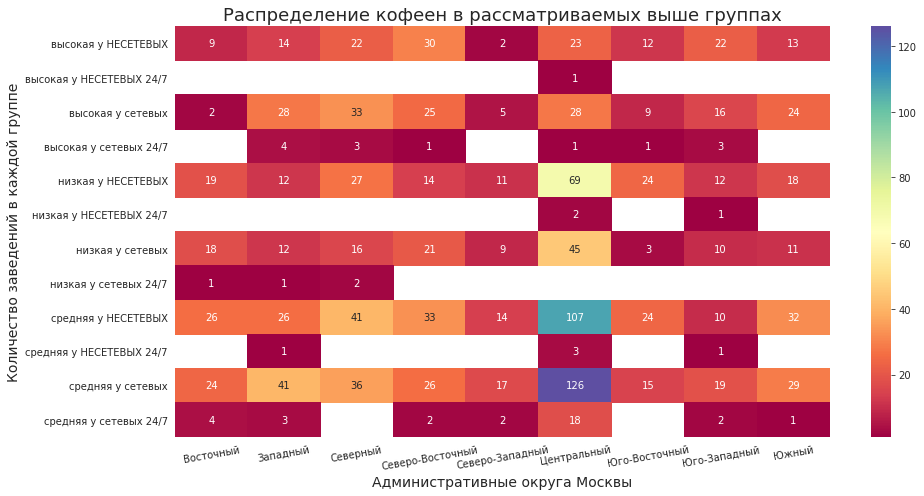

In [66]:
#задаём наименования столбцам
values = ['высокая у НЕСЕТЕВЫХ','высокая у НЕСЕТЕВЫХ 24/7','высокая у сетевых','высокая у сетевых 24/7',
          'низкая у НЕСЕТЕВЫХ','низкая у НЕСЕТЕВЫХ 24/7','низкая у сетевых','низкая у сетевых 24/7',
          'средняя у НЕСЕТЕВЫХ','средняя у НЕСЕТЕВЫХ 24/7','средняя у сетевых','средняя у сетевых 24/7']

#создаём основную тепловую карту библиотекой seaborn
plt.figure(figsize=(14, 7)) #устанавливаем размер графика
sns.heatmap((coffeehouse.pivot_table(index=['competing','chain','is_24/7'], columns='area', values='rating', aggfunc='mean')), 
            annot=True, fmt='.2f', cmap='Spectral',
            yticklabels=values, xticklabels=list(coffeehouse['area'].sort_values().unique()))
#присваиваем название графика и описание по осям
plt.title('Медианные рейтинги кофеен по районам в зависимости от их уровня конкуренции, \
          \nпринадлежности к сети и графику работы', fontsize=18)
plt.ylabel('Уровень конкуренции кофеен \nпо отношению к сети и графику работы', fontsize=14) 
plt.xlabel('Административные округа Москвы', fontsize=14)
plt.xticks(rotation=10)
plt.tight_layout()
plt.show() 

#создаём вспомогательную тепловую карту
plt.figure(figsize=(14, 7)) #устанавливаем размер графика
sns.heatmap((coffeehouse.pivot_table(index=['competing','chain','is_24/7'], columns='area', values='rating', aggfunc='count')), 
            annot=True, fmt='.0f', cmap='Spectral', 
            yticklabels=values, xticklabels=list(coffeehouse['area'].sort_values().unique()))
#присваиваем название графика и описание по осям
plt.title('Распределение кофеен в рассматриваемых выше группах', fontsize=18)
plt.ylabel('Количество заведений в каждой группе', fontsize=14) 
plt.xlabel('Административные округа Москвы', fontsize=14)
plt.xticks(rotation=10)
plt.tight_layout()
plt.show() 

- Самый высокий средний рейтинг в `Центральном административном округе` у несетевой кофейни, которая работает ежедневно и круглосуточно в условиях высокой конкуренции: 4,9. Также можно отметить высокий средний рейтинг у круглосуточных несетевых кофеен с низкой конкуренцией — 4,55. Самый низкий в этом районе средний рейтинг у круглосуточных сетевых заведений с высокой конкуренцией.
- Самая низкая оценка у сетевой круглосуточной кофейни с высокой конкуренцией в `Юго-Восточном административном округе`, на втором с конца месте находится кофейня из этой же группы в `Северо-Восточном административном округе`. Также можно отметить, что у 9 некруглосуточно работающих сетевых кофеен с высокой конкуренцией из `Юго-Восточного округа` средний рейтинг тоже весьма низкий — 3,87. 
- Среди сетевых кофеен всех групп, самый высокий средний рейтинг у двух заведений из `Восточного административного округа`, эти объекты работают не круглосуточно и располагаются в месте с высокой конкуренцией. Более того, в этом районе только эта группа кофеен имеет такой высокий средний рейтинг.
- Также можно отметить достаточно высокий рейтинг — 4,65 и 4,53 у несетевых и некруглосуточных кофеен с высокой и низкой конкуренцией соответственно в `Северо-Западном административном округе`. В этом районе минимальное количество кофеен, и в этих двух группах среднее высчитывалось из 2 и 11 объектов. Врочем, это не отменяет того, что у всех сетевых заведений района средние рейтинги значительно ниже, а максимальное количество — 17 кофеен — в группе некруглосуточных заведений со средней конкуренцией и минимальный в районе рейтингом 4,16.
- Также среди некруглосуточных и несетевых кофеен хорошие рейтинги в `Южном` и `Северном` административных округах у заведений с высокой конкуренцией.

Рассмотрим рейтинги исключительно между несетевых заведений, чтобы предположить наиболее перспективные места для открытия кофейни.

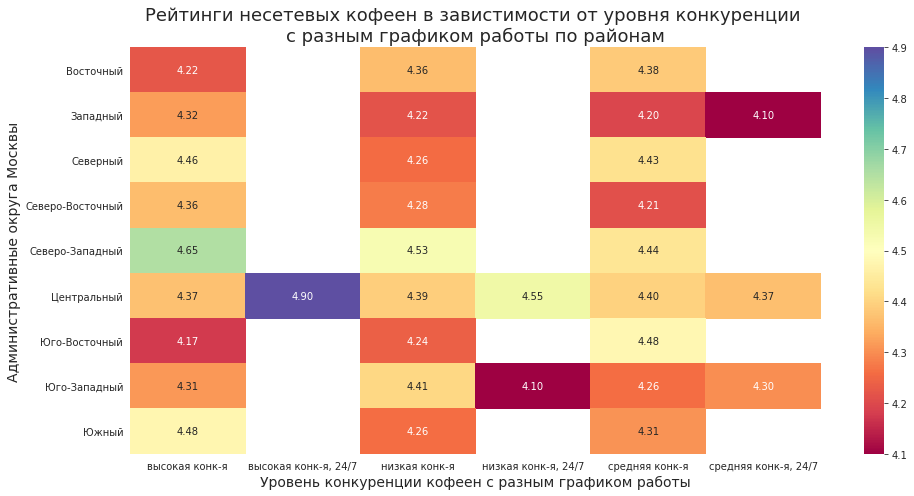

In [67]:
#задаём наименования столбцам
values = ['высокая конк-я','высокая конк-я, 24/7','низкая конк-я','низкая конк-я, 24/7',
          'средняя конк-я','средняя конк-я, 24/7']

#создаём основную тепловую карту
plt.figure(figsize=(14, 7)) #устанавливаем размер графика
sns.heatmap((coffeehouse.query('chain == "Несетевое заведение"')
             .pivot_table(index='area', columns=['competing','is_24/7'], values='rating', aggfunc='mean')), 
            annot=True, fmt='.2f', cmap='Spectral',
            xticklabels=values, yticklabels=list(coffeehouse['area'].sort_values().unique()))
#присваиваем название графика и описание по осям
plt.title('Рейтинги несетевых кофеен в завистимости от уровня конкуренции \nс разным графиком работы по районам', fontsize=18)
plt.xlabel('Уровень конкуренции кофеен с разным графиком работы', fontsize=14) 
plt.ylabel('Административные округа Москвы', fontsize=14)
plt.tight_layout()
plt.show() 

Наиболее привлекательными выглядят средние рейтинги от 4,4 и выше — и если ориентироваться на эти оценки, то можно рассмотреть такие места для открытия новой кофейни:
- При открытии кофейни в `Центральном административном округе` в местах с высокой или низкой конкуренцией, лучшим решением будет сделать заведение круглосуточным. В условиях средней конкуренции заведение может работать не 24/7. Этот район выделяется наибольшим количеством кофеен в целом.
- В `Северо-Западном` можно делать кофейню некруглосуточной и предпочтительней на улицах с высокой конкуренцией, затем рассматривать места с низкой и средней конкуренцией с таким же графиком работы. В целом, в этом районе минимальное количество заведений.
- В `Северном административном округе` может быть высоко оценена посетителями некруглосуточная кофейня, расположенная в месте с высокой или средней конкуренцией.
- В `Южном административном округе` можно открыть некруглосуточную кофейню в месте с высокой конкуренцией.
- В `Юго-Западном` более перспективным будет открытие некруглосуточной кофейни, расположенной с низкой конкуренцией.
- В `Юго-Восточном административном округе` можно открыть некруглосуточную кофейню на улице со средней конкуренцией.

### На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

In [68]:
#выведем статистику по столбцу
coffeehouse['middle_coffee_cup'].describe()

count     513.000000
mean      174.879142
std        90.108404
min        60.000000
25%       124.000000
50%       169.000000
75%       225.000000
max      1568.000000
Name: middle_coffee_cup, dtype: float64

В столбце `middle_coffee_cup` очень подозрительно выглядит максимальная стоимость одной чашки капучино за 1568 рублей. Отсечём это значение и проверим, как будет выглядеть статистика.

In [69]:
coffeehouse.query('middle_coffee_cup != 1568')['middle_coffee_cup'].describe()

count    512.000000
mean     172.158203
std       65.802590
min       60.000000
25%      124.000000
50%      168.000000
75%      225.000000
max      375.000000
Name: middle_coffee_cup, dtype: float64

В датасете одно заведение с такой высокой стоимостью чашки капучино. Построим гистограмму без учёта этой аномальной кофейни с разделеним по принадлежности к сети.

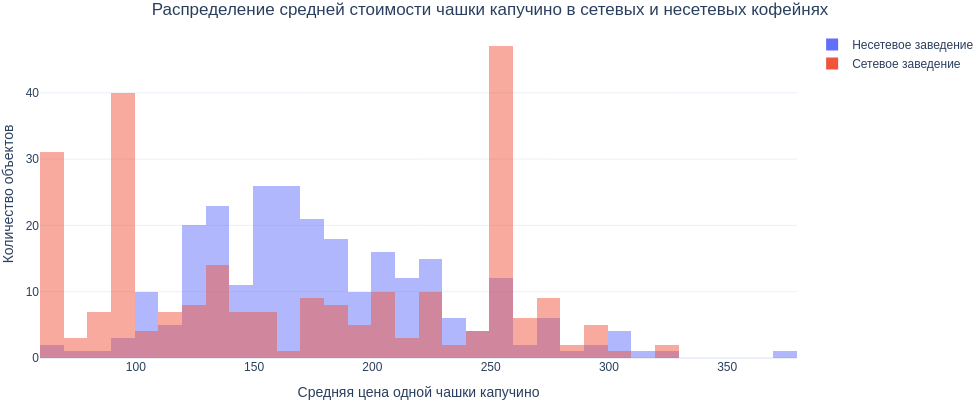

In [70]:
#строим гистограмму
fig = px.histogram(coffeehouse.query('middle_coffee_cup != 1568'), x='middle_coffee_cup',color='chain', 
                   title='Распределение средней стоимости чашки капучино в сетевых и несетевых кофейнях', 
                   nbins=50, width=980, height=400, template='plotly_white', barmode='overlay', 
                   labels={'chain':''}) 
#описание по осям
fig.update_xaxes(title_text='Средняя цена одной чашки капучино')
fig.update_yaxes(title_text='Количество объектов')
fig.update_layout(title_x=0.5, margin=dict(l=1, r=1, t=30, b=1)) #меняем расположение шапки
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=400, scale=1)
Image('figure.png')

Среди сетевых кофеен наиболее распространены цены: от 60 до 69 рублей за чашку капучино, от 90 до 99 рублей и от 250 до 259 рублей за чашку капучино.

А вот среди несетевых кофеен можно заметить распредение цен, близкое к распределению Пуассона: наивысший пик приходится на диапазон цен от 150 до 169 рублей за чашку капучино, вправо и влево от этой цены стоимость снижается, если не учитывать провалы с 10-11 кофейнями на 190-199 и 140-149 рублях соответственно. Можно предположить, что основной диапазон цен на чашку капучино в несетевых кофейнях 100-230 рублей. 

**Построим тепловую карту для несетевых кофеен по этому диапазону цен и рейтингам.** 

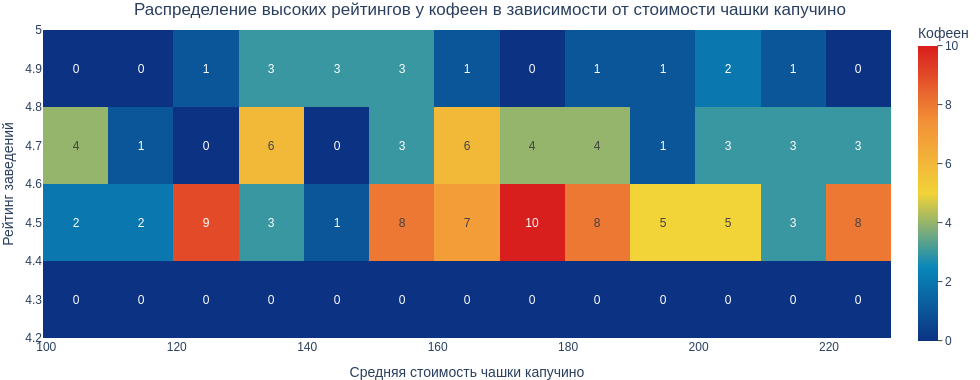

In [71]:
#создаём тепловую карту
fig = px.density_heatmap((coffeehouse
                          .query('230 > middle_coffee_cup >= 100 and chain == "Несетевое заведение" and rating >= 4.4')), 
                         x='middle_coffee_cup', y='rating', text_auto=True,
                         title='Распределение высоких рейтингов у кофеен в зависимости от стоимости чашки капучино',
                         color_continuous_scale='Portland', nbinsx=20, height=380, width=980)
#описание по осям
fig.update_xaxes(title_text='Средняя стоимость чашки капучино')
fig.update_yaxes(title_text='Рейтинг заведений')
#настройка легенды
fig.update_layout(coloraxis_colorbar=dict(title='Кофеен', ticksuffix='',
                                          thicknessmode='pixels', thickness=20, lenmode='pixels', len=336,
                                          yanchor='top', y=1.05, ticks='outside', dtick=2), 
                  title_x=0.5, margin=dict(l=1, r=1, t=30, b=1))
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=380, scale=1)
Image('figure.png')

На этой тепловой карте мы можем увидеть, что при стоимости чашки капучино за 150-159 рублей, у кофейни наиболее высока вероятность получать высокие рейтинги. При этом, нельзя отказываться и от расценок до 179 рублей за чашку капучино — эти цены есть ещё у 28 заведений с высоким рейтингом. Более высокие цены могут быть обяснены районом, в котором располагается кофейня. Рассмотривать цены ниже 150 не будем, так как цель коммерческого предприятия — зарабатывать деньги, а значит, ориентироваться лучше на места c наибольшей выручкой.

**Рассмотрим средние рейтинги по районам в зависимости от цены чашки капучино.**

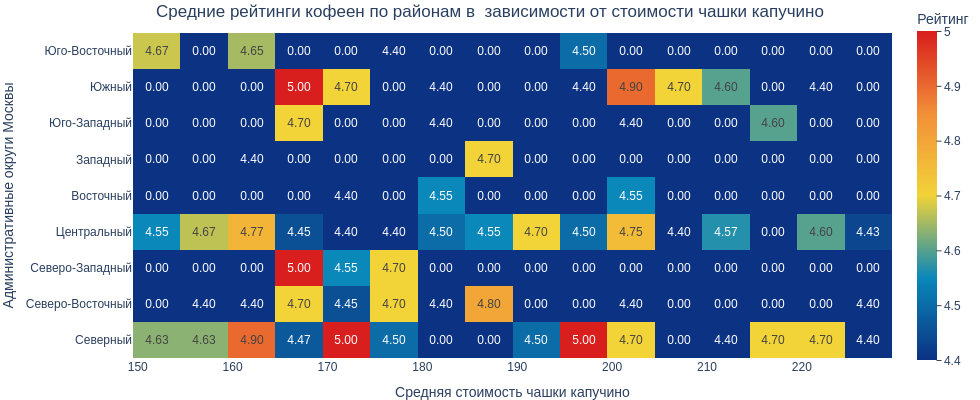

In [72]:
#создаём тепловую карту
fig = px.density_heatmap((coffeehouse
                          .query('230 > middle_coffee_cup >= 150 and chain == "Несетевое заведение" and rating >= 4.4')), 
                         x='middle_coffee_cup', y='area', z='rating', histfunc='avg', text_auto='.2f', 
                         title='Средние рейтинги кофеен по районам в  зависимости от стоимости чашки капучино',
                         color_continuous_scale='Portland', nbinsx=20, height=400, width=980)
#описание по осям
fig.update_xaxes(title_text='Средняя стоимость чашки капучино')
fig.update_yaxes(title_text='Административные округи Москвы') 
#настройка легенды
fig.update_layout(coloraxis_colorbar=dict(title='Рейтинг', ticksuffix='',
                                          thicknessmode='pixels', thickness=20, lenmode='pixels', len=370,
                                          yanchor='top', y=1.1, ticks='outside', dtick=0.1), 
                  title_x=0.5, margin=dict(l=1, r=1, t=30, b=1))
#сохраняем график как изображение png для github
pio.write_image(fig, 'figure.png', width=980, height=400, scale=1)
Image('figure.png')

Ранее мы уже выделили самые перспективные места для будущей кофейни. Рассмотрим, какие цены на чашку капучино можно установить в зависимости от места расположения.
- В `Центральном административном округе` самый высокий рейтинг у кофеен с ценой 160, это хорошая цена в условиях средней конкуренции у некруглосуточной кофейни. Если график работы будет 24/7, то можно рассмотреть стоимость одной чашки капучино 200 рублей в условиях низкой конкуренции и 190 — в условиях высокой. Это позволит быстрее окупить заведение при круглосуточной работе.
- В `Северо-Западном` самой перспективной может быть цена 165 рублей за чашку капучино, при хорошем расположении можно поднять цену до 175 рублей.
- В `Северном административном округе` в условиях высокой конкуренции стоит использовать цену 160 или 170. При средней конкуренции цену за чашку капучино можно поднять до 195 рублей, можно и до 220, но в этом случае требовательность посетителей может быть выше.
- В `Южном административном округе` лучшей ценой за чашку капучино будет 160 рублей, если у ближайших конкурентов стоимость значительно выше, то в новой кофейне её тоже можно будет поднять до 200 рублей.
- В `Юго-Западном` стоимость чашки капучино должна быть 165 рублей.
- В `Юго-Восточном административном округе` можно установить цену в 150 рублей или ниже, так как рейтинги в этой районе с ценами выше этой суммы значительно проседают, относительно других рассматриваемых точек.
<a id='section_id12'></a>

**Резюмируя, можно сузить территорию поиска для будущего заведения:**
- Если кофейня будет круглосуточной, то наилучший вариант размещения: `Центральный административный округ` со средним уровнем конкуренции и стоимостью чашки капучино в 190 рублей или с высокой конкуренцией и 200 рублями за чашку капучино.  
- Можно рассмотреть места в `Северном` и `Южном` административных округах, рассположенные на улицах с высокой конкуренцией, там цену за чашку капучино можно установить в районе 195-200 рублей в кофейне с некругосуточным графиком работы.
- Также некруглосуточную кофейню можно открыть в `Северо-Западном` или `Юго-Западном` административных округах с высоким или низким соответственно уровнем конкуренции и со стоимостью чашки капучино в 165 рублей.

Для выявления наилучших мест в этих районах, следует провести анализ проходимости точек, в которых может расположиться будущая кофейня.

## Презентация
<div style="text-align: right;"><a href="#table_of_contents">к оглавлению</a></div>

[Ссылка на облачное хранилище с презентацией](https://disk.yandex.ru/d/KnvhnRfp104bxQ)